# Organoid Learning Evaluation
Using the CartPole system as a dynamic control task, these methods evaluate the adaptive learning capacity of cortical organoids using short, high-frequency training signals to targeted neurons.

In [28]:
import os
import sys
import numpy as np
import pickle
import importlib
import matplotlib.pyplot as plt
import pandas as pd

# Check module path
module_path = os.path.abspath(os.path.join(''))  # adjust if needed
if module_path not in sys.path:
    sys.path.append(module_path)

# Import / reload full modules
import core.data_loader as data_loader
importlib.reload(data_loader)
import core.analysis_utils as analysis_utils
importlib.reload(analysis_utils)
import viz.plots_general as plots_general
importlib.reload(plots_general)
import braindance
importlib.reload(braindance)
import core.map_utils as map_utils
importlib.reload(map_utils)
import OrgLearningEval
importlib.reload(OrgLearningEval)

# Import specific functions
from OrgLearningEval import OrgLearningEval


In [38]:
# Check if core directory is in sys.path

# Print out current working directory
print("Current working directory:", os.getcwd())

# Print search path list
print("\nPython sys.path:")
for p in sys.path:
    print("  ", p)

# Check whether 'core/data_loader.py' exists from this working directory
core_path = os.path.join(os.getcwd(), "core", "data_loader.py")
print("\nChecking for core/data_loader.py:")
print("Exists" if os.path.exists(core_path) else "  NOT FOUND")

# Check core directory contents
print("Contents of ./core/:", os.listdir("./core"))

Current working directory: /Users/main_mac/data/org_eval

Python sys.path:
   /Users/main_mac/data
   /Users/main_mac/data/org_eval/braindance
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers/pydev
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers-pro/jupyter_debug
   /opt/anaconda3/envs/brain/lib/python310.zip
   /opt/anaconda3/envs/brain/lib/python3.10
   /opt/anaconda3/envs/brain/lib/python3.10/lib-dynload
   
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages
   /Users/main_mac/data/org_eval
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages/setuptools/_vendor

Checking for core/data_loader.py:
Exists
Contents of ./core/: ['data_loader.py', '__init__.py', 'spike_data_utils.py', '__pycache__', 'map_utils.py', 'analysis_utils.py']


In [39]:
try:
    from core.data_loader import load_pickle, load_datasets
    print("Imported successfully.")
except Exception as e:
    print("Import failed:", e)


Imported successfully.


Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.Spike

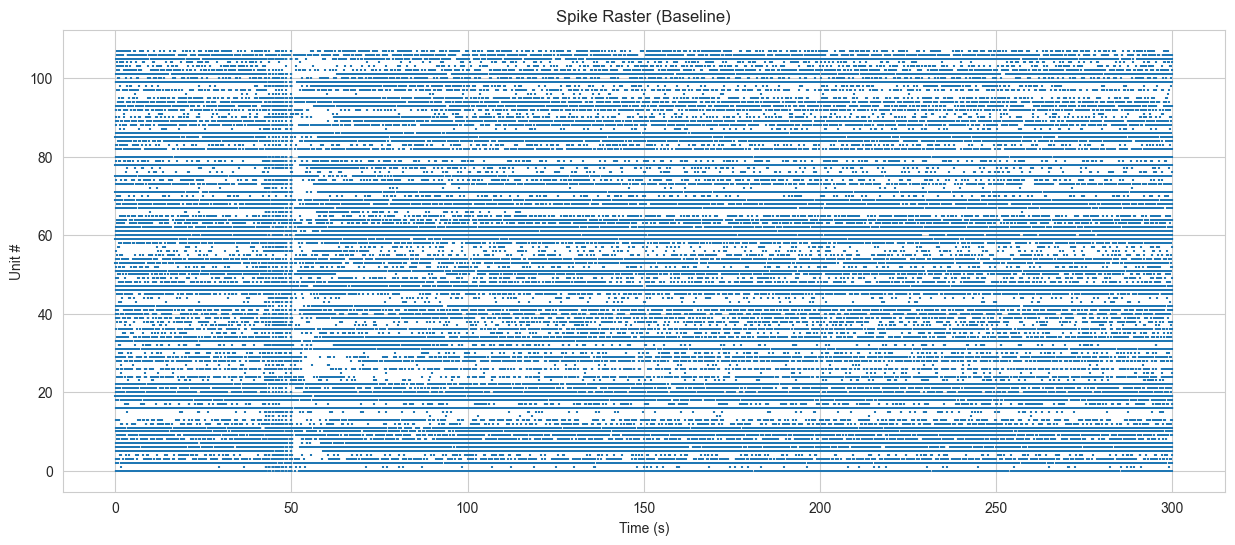

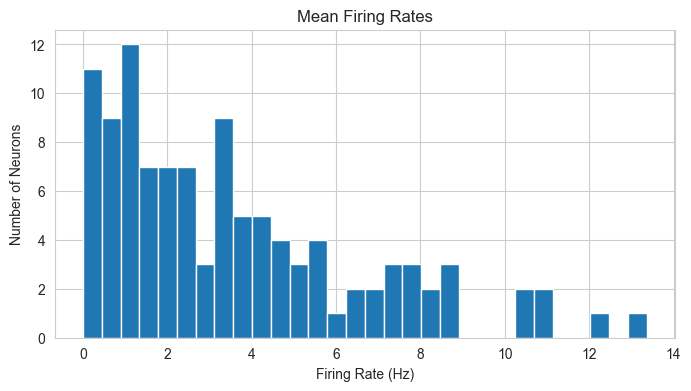

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


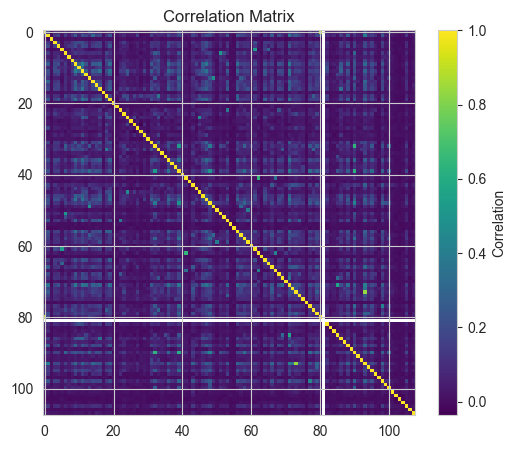

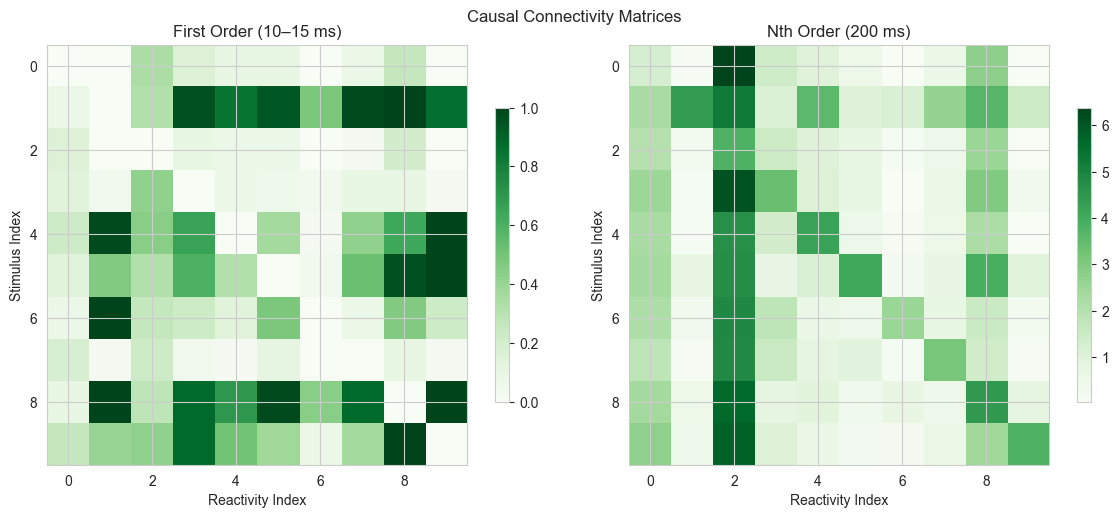

In [29]:
ole = OrgLearningEval()  # Loads all datasets and keys contained, sets "Baseline" as default dataset, and prints confirmation
ole.show_raster()        # Shows raster for default dataset
ole.show_mean_firing_rates() # Shows mean firing rate plot for default dataset
ole.show_correlation_matrix()  # Shows a correlation matrix plot for default dataset
ole.show_causal_plot() # Shows matrix of first-order and multi-order connectivity for organoid of interest

In [42]:
print("Stim Indices:", ole.metadata["stim_inds"])
print("Training Indices:", ole.metadata["training_inds"])
print("Encode Indices:", ole.metadata["encode_inds"])

Stim Indices: [0 1 2 3 4 5 6 7]
Training Indices: [1, 2, 3, 4, 5, 6]
Encode Indices: [0, 7]


In [44]:
# Get the labeled task unit info table from metadata
df = ole.metadata["task_unit_info"]

# Filter only the rows with assigned task roles
task_units = df[df["is_task_unit"] == True]

# Print to console
print(task_units)

   channel  electrode       x       y      role  is_task_unit
0        0      18598  2065.0  1470.0    encode          True
1        1      20644  3220.0  1627.5  training          True
2        2      19040  2100.0  1505.0  training          True
3        3      21723  2852.5  1715.0  training          True
4        4      14939  3482.5  1172.5  training          True
5        5      21078  3115.0  1662.5  training          True
6        6      17051  1942.5  1347.5  training          True
7        7      15172  3710.0  1190.0    encode          True
8        8      18817  2047.5  1487.5    decode          True
9        9      20640  3150.0  1627.5    decode          True


In [18]:
print(ole.sd_main.subset.__doc__)


        Return a new SpikeData with spike times for only some units, selected either by
        their indices or by an ID stored under a given key in the neuron_attributes.

        Units are included in the output according to their order in self.train, not the
        order in the unit list (which is treated as a set).

        If IDs are not unique, every neuron which matches is included in the output.
        Neurons whose neuron_attributes entry does not have the key are always excluded.
        


Switched to dataset: Adaptive


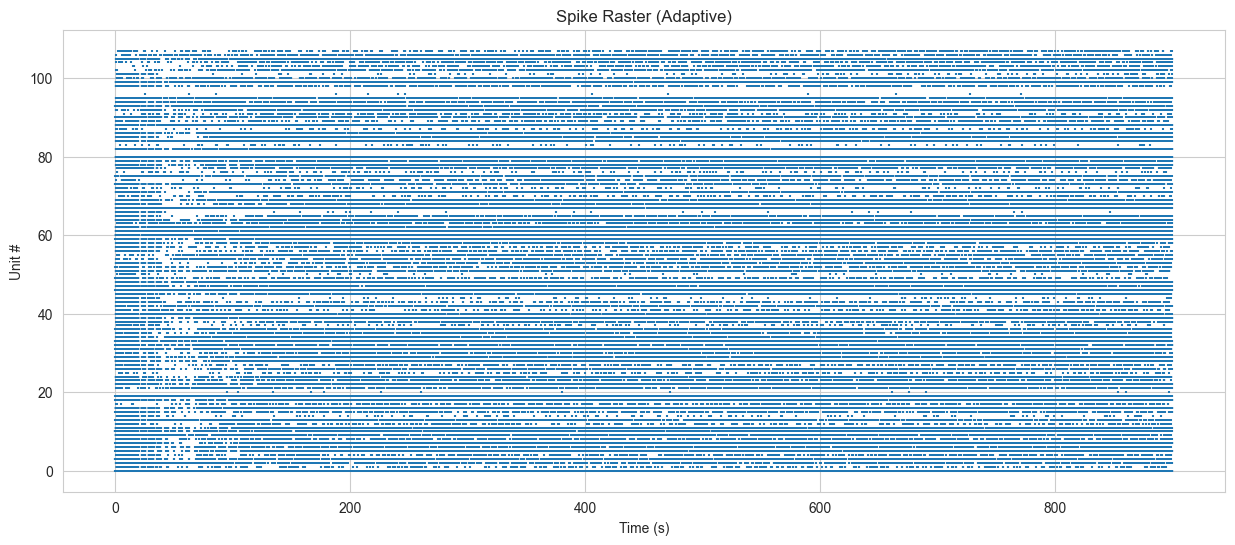

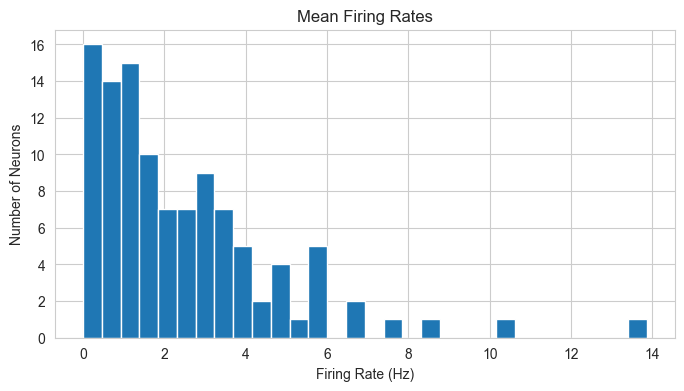

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


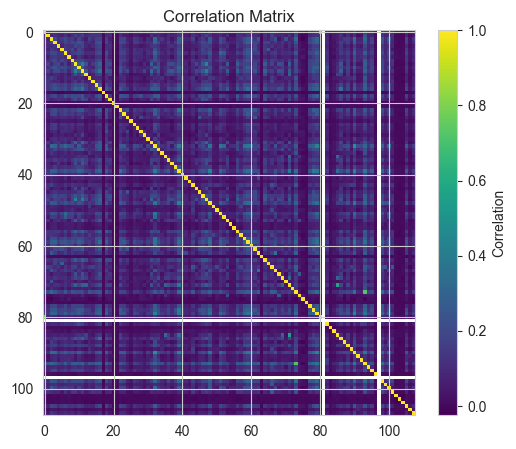

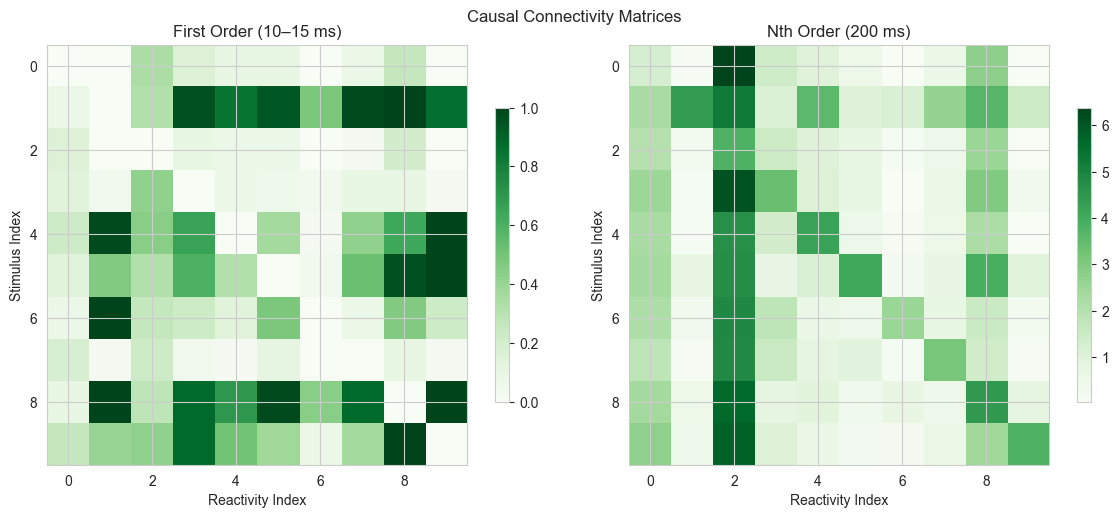

In [10]:
# Switch to different training condition and view plots
ole.set_dataset("Adaptive")
ole.show_raster()
ole.show_mean_firing_rates()
ole.show_correlation_matrix()
ole.show_causal_plot()


In [4]:
ole = OrgLearningEval()
reward_df = ole.get_reward_df("Adaptive")
reward_df.head()

Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.Spike

time  episode  reward
0   3.911218        0    19.0
1  18.770805        1    56.0
2  24.654084        2    12.0
3  31.596691        3    17.0
4  38.112137        4    15.0

In [5]:
print("Adaptive Reward DataFrame:")
display(ole.get_reward_df("Adaptive").head())

print("\n Random Reward DataFrame:")
display(ole.get_reward_df("Random").head())

print("\n Null Reward DataFrame:")
display(ole.get_reward_df("Null").head())

Adaptive Reward DataFrame:


time  episode  reward
0   3.911218        0    19.0
1  18.770805        1    56.0
2  24.654084        2    12.0
3  31.596691        3    17.0
4  38.112137        4    15.0


 Random Reward DataFrame:


time  episode  reward
0  10.916741        0    53.0
1  22.128940        1    38.0
2  28.397783        2    14.0
3  35.692659        3    19.0
4  63.851734        4   120.0


 Null Reward DataFrame:


time  episode  reward
0   4.958258        0    24.0
1  18.258702        1    48.0
2  26.177174        2    22.0
3  36.393520        3    33.0
4  42.694989        4    14.0

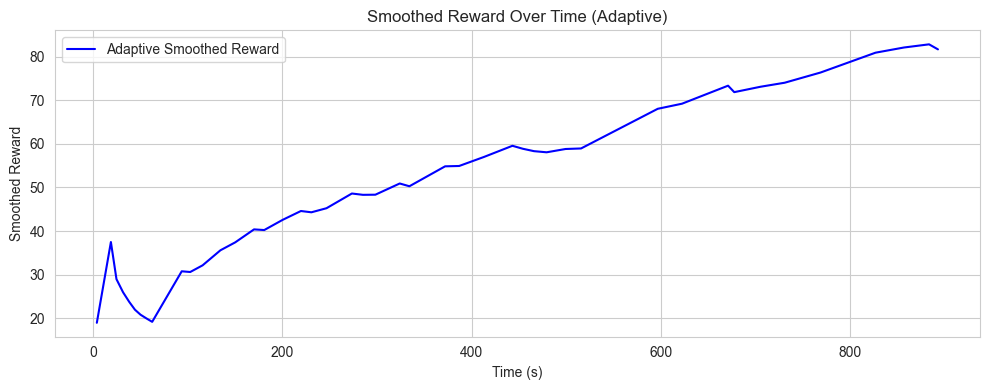

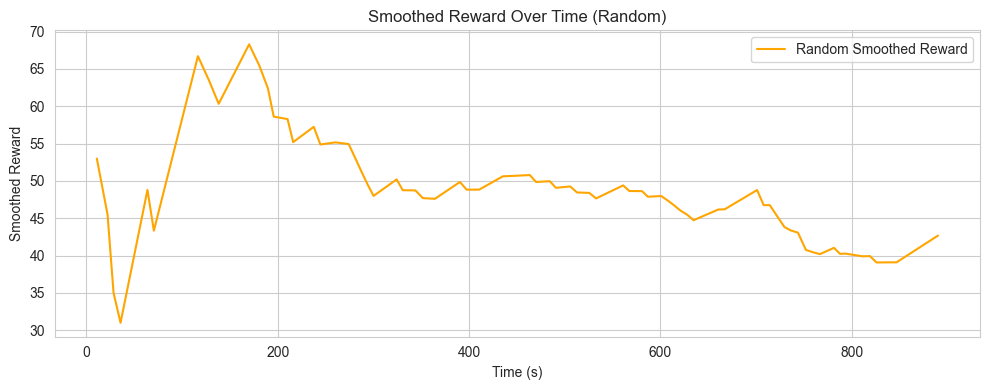

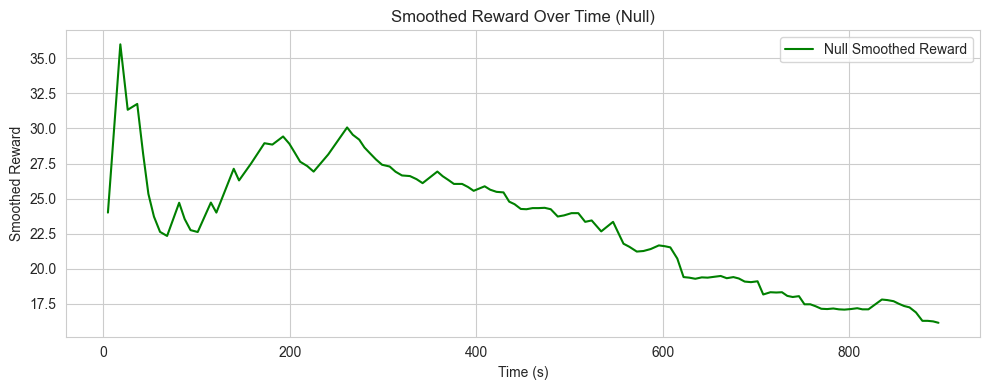

In [6]:
ole.show_reward_plot("Adaptive", color="blue")
ole.show_reward_plot("Random", color="orange")
ole.show_reward_plot("Null", color="green")

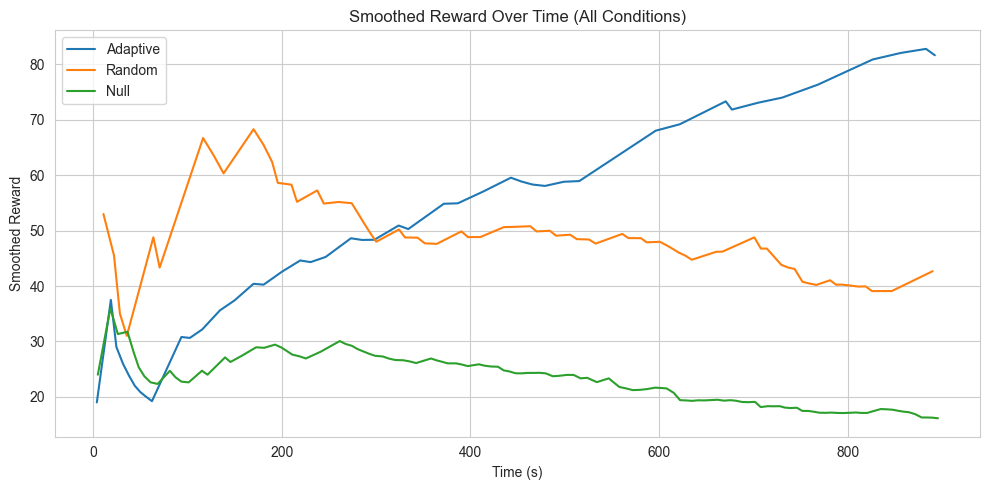

In [88]:
ole.show_all_rewards_overlay()

In [7]:
encode_local = [0, 7]  # or any valid indices from 0 to 9
decode_local = [8, 9]  # also from 0 to 9

In [8]:
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]

c1_values = [first_order[i, j] for i in encode_local for j in decode_local]
cm_values = [multi_order[i, j] for i in encode_local for j in decode_local]
burst_values = [burst_percent[j] for j in decode_local]

NameError: name 'causal_info' is not defined

In [9]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'c1_values' is not defined

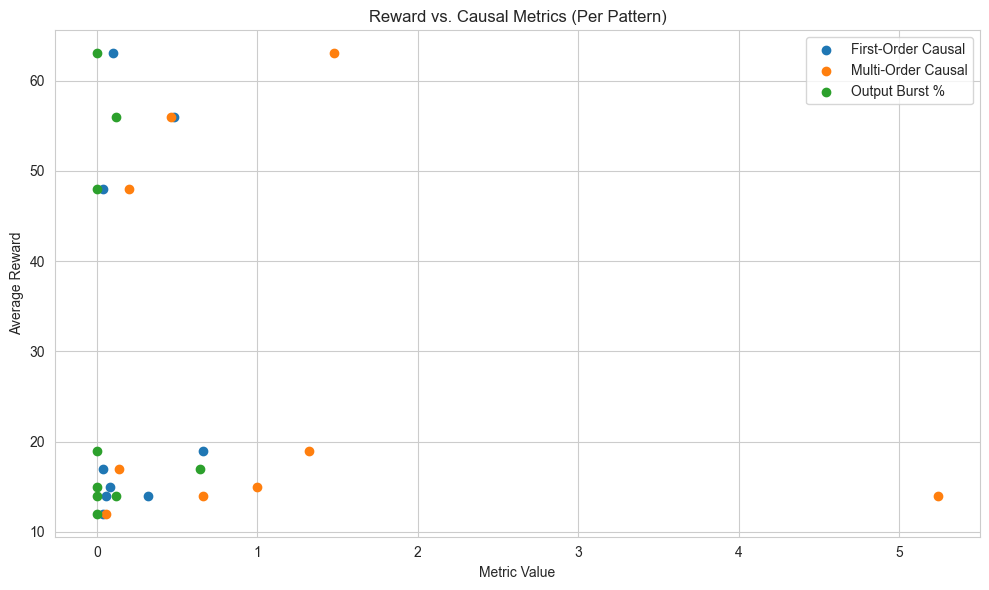

Pattern  AvgReward  FirstOrder  MultiOrder  Burst
0     1-2       14.0        0.32        5.24   0.00
1     2-3       63.0        0.10        1.48   0.00
2     2-4       15.0        0.08        1.00   0.00
3     3-1       17.0        0.04        0.14   0.64
4     3-5       14.0        0.06        0.66   0.12
5     3-6       12.0        0.04        0.06   0.00
6     4-3       19.0        0.66        1.32   0.00
7     5-6       48.0        0.04        0.20   0.00
8     6-5       56.0        0.48        0.46   0.12

In [18]:
ole.show_reward_vs_causal_plot()            # Reward vs causal metrics for Adaptive

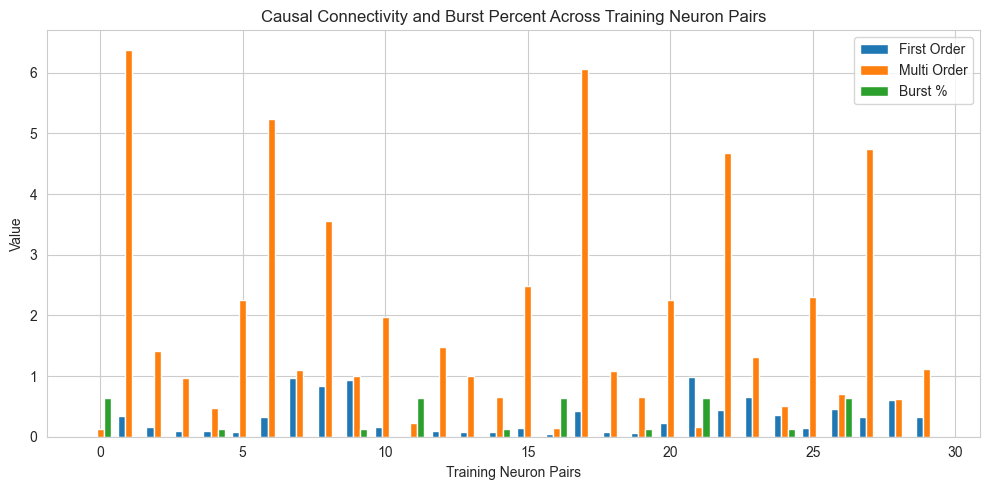

In [19]:
ole.show_training_pair_plot(num_neurons=10) # Metrics across 6 training neurons

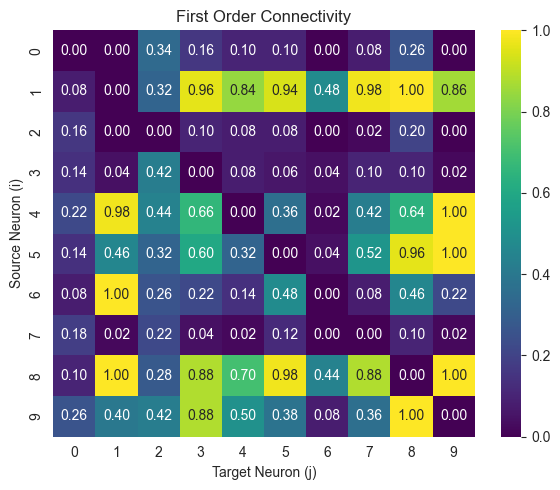

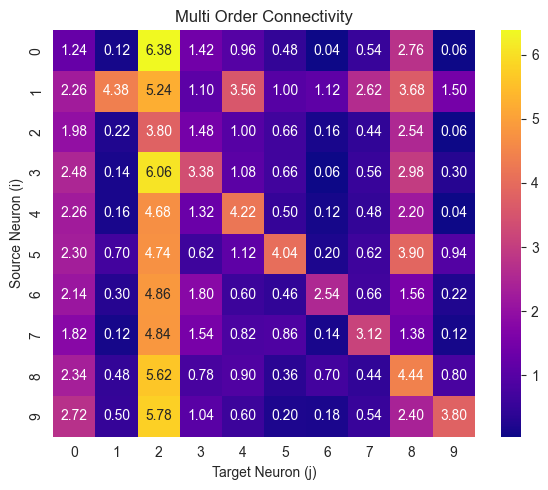

In [20]:
ole.show_connectivity_heatmaps()            # Heatmaps of connectivity matrices

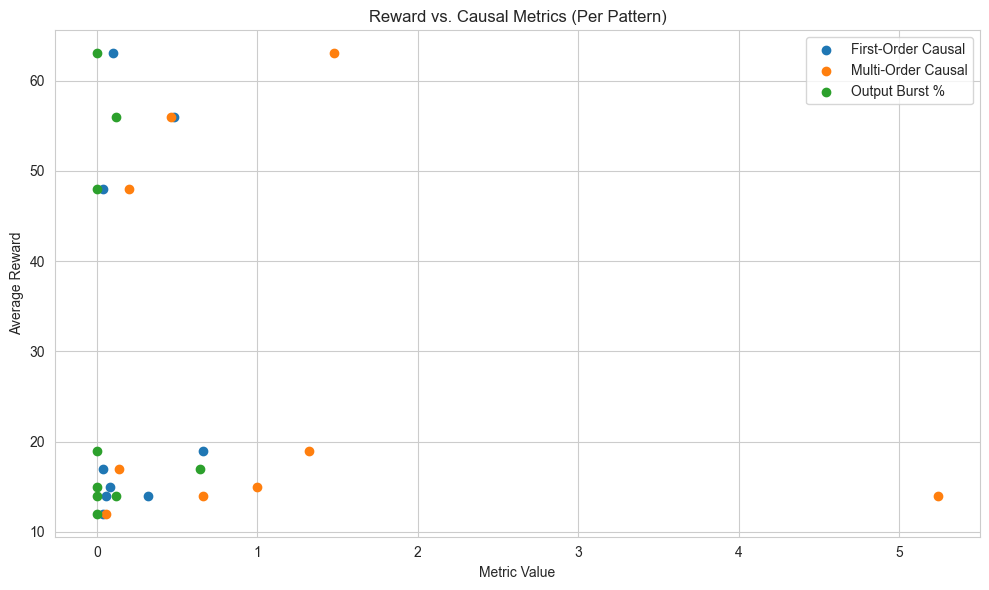

In [21]:
df = ole.show_reward_vs_causal_plot("Adaptive")

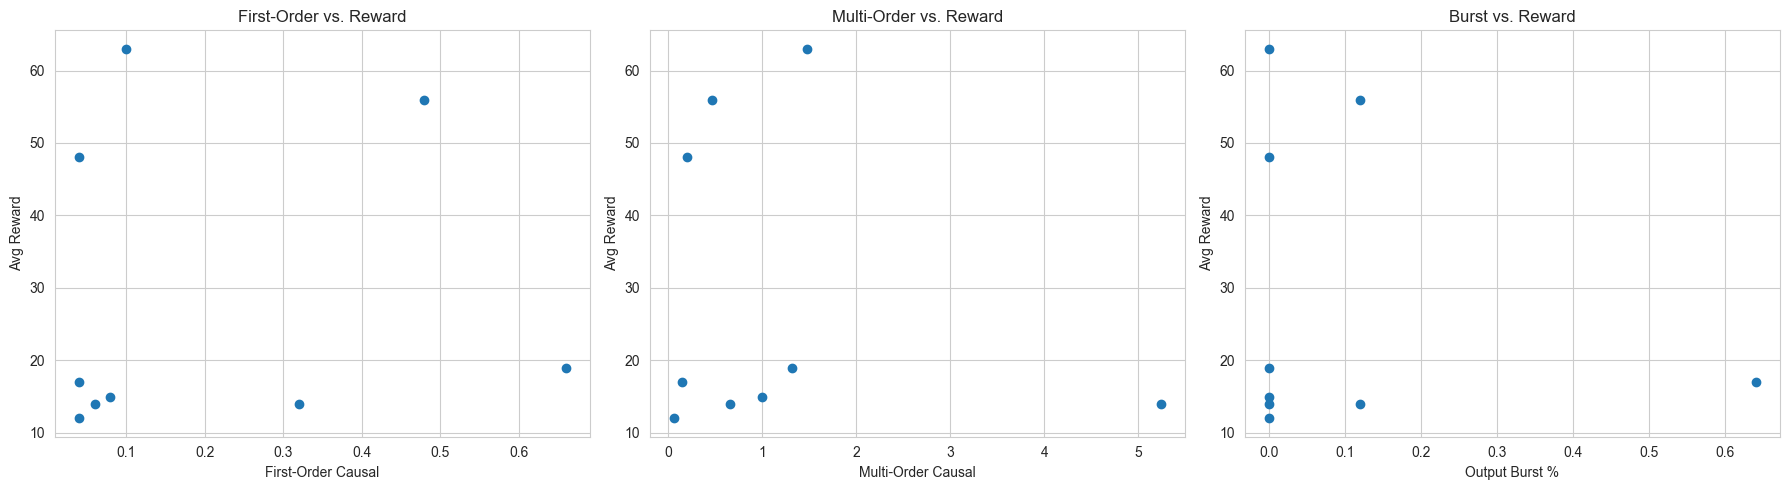

In [22]:
# Scatter plots of metrics vs reward
ole.show_metric_scatter_plots(df)

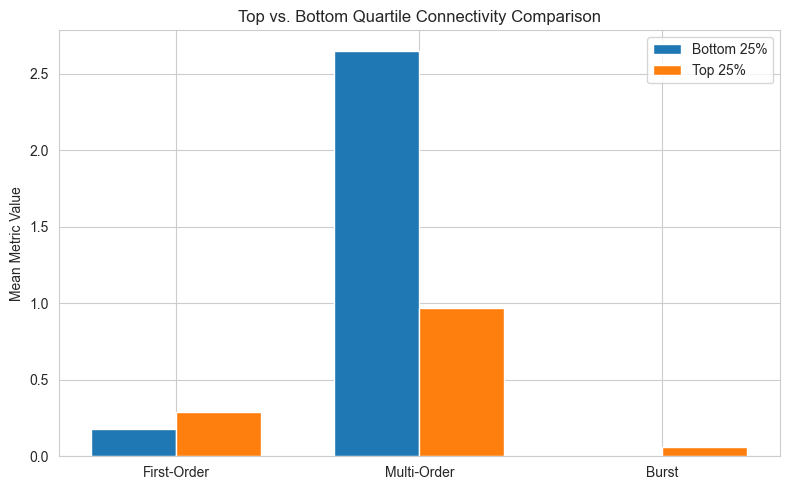

In [23]:
# Top vs bottom quartile metric comparison
ole.show_quartile_comparison_plot(df)

In [24]:
print(df.columns)
print(df.head())

Index(['Pattern', 'AvgReward', 'FirstOrder', 'MultiOrder', 'Burst'], dtype='object')
  Pattern  AvgReward  FirstOrder  MultiOrder  Burst
0     1-2       14.0        0.32        5.24   0.00
1     2-3       63.0        0.10        1.48   0.00
2     2-4       15.0        0.08        1.00   0.00
3     3-1       17.0        0.04        0.14   0.64
4     3-5       14.0        0.06        0.66   0.12


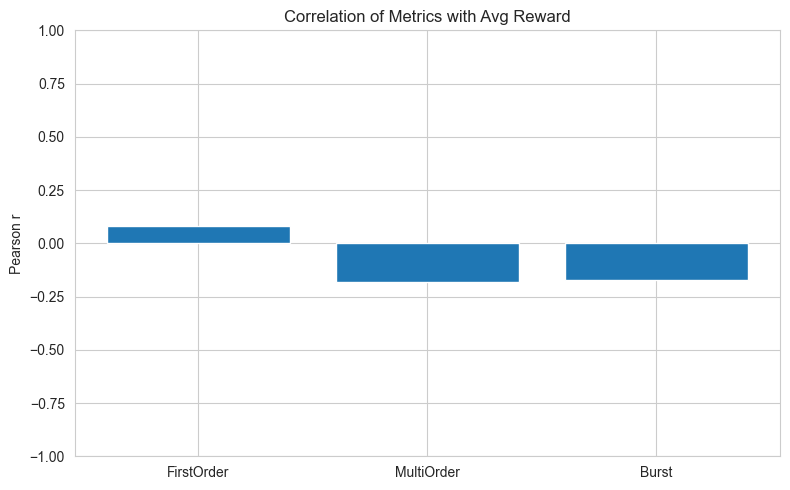

In [25]:
# Pearson correlation bar plot
ole.show_metric_correlation_plot(df)

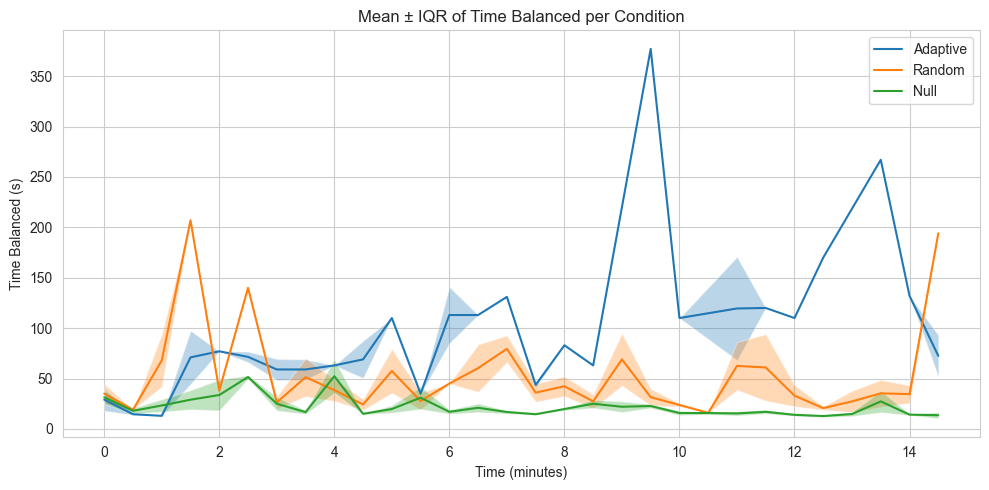

In [26]:
# Time balanced summary for all conditions
ole.show_performance_summary(bin_size=30, conditions=["Adaptive", "Random", "Null"])

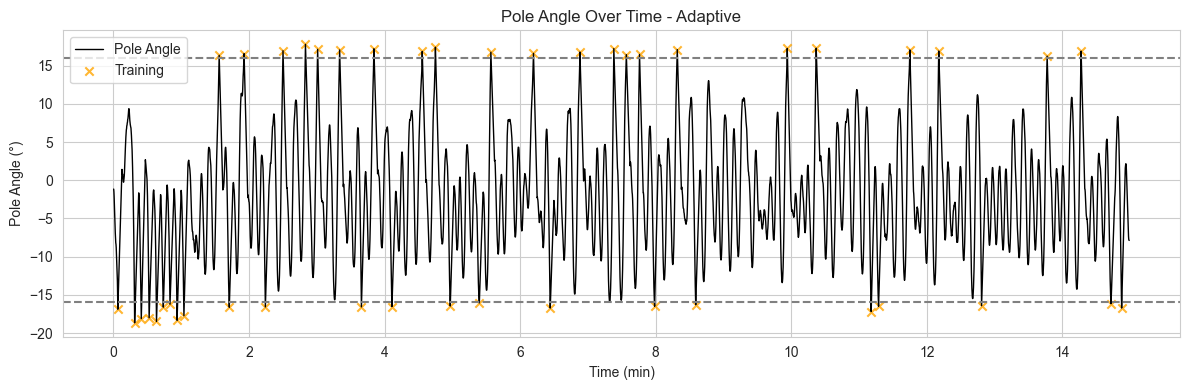

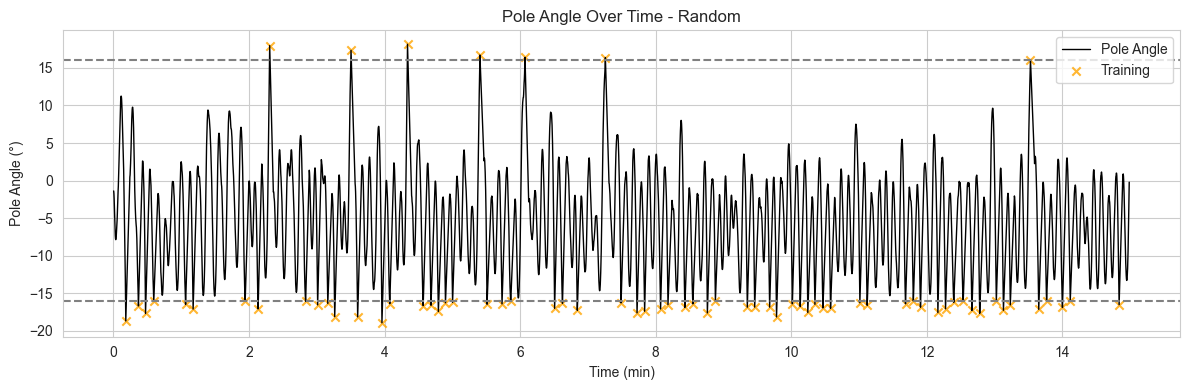

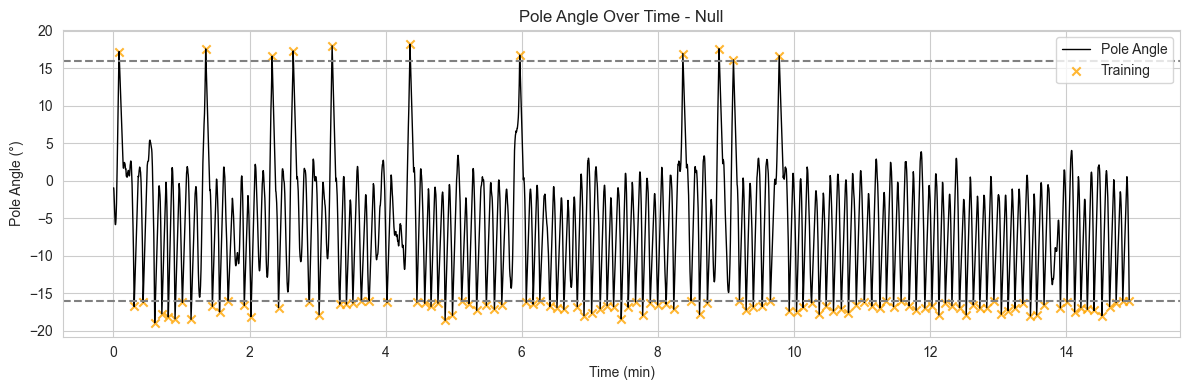

In [27]:
# Plot pole angle over time with shaded episodes and stim timings
ole.show_pole_angle_trajectories("Adaptive")
ole.show_pole_angle_trajectories("Random")
ole.show_pole_angle_trajectories("Null")

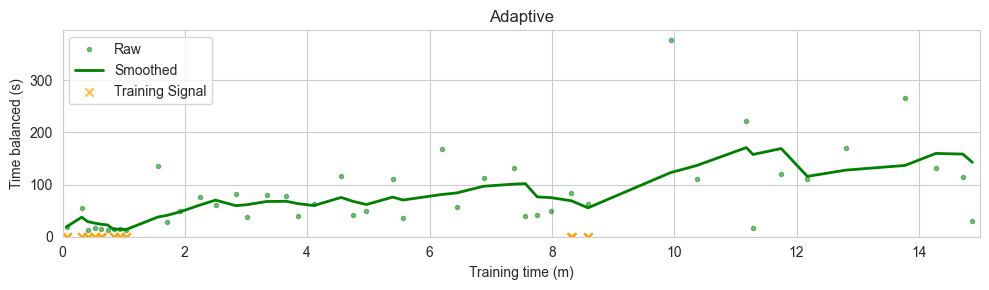

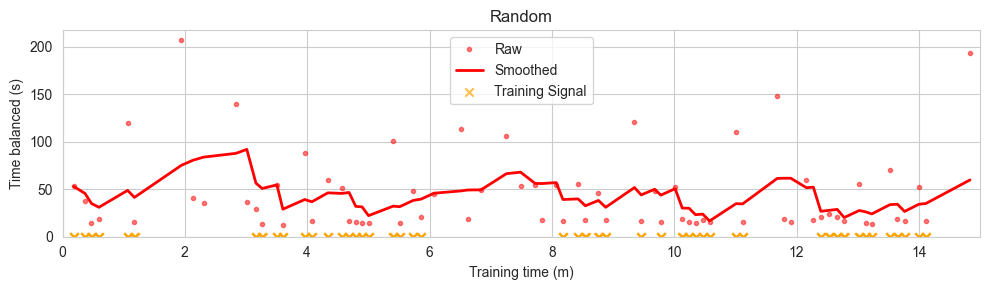

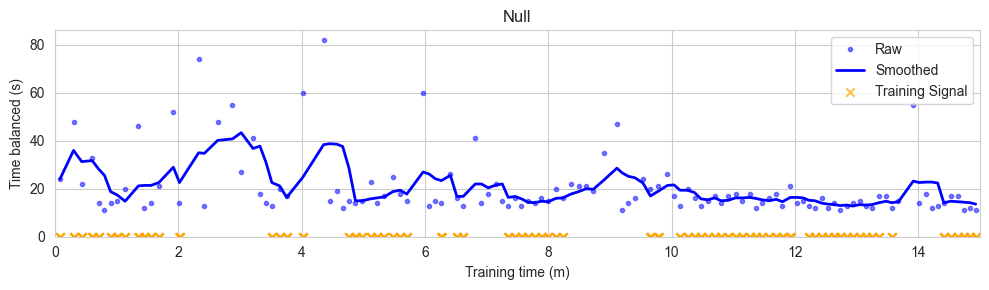

In [28]:
# Show episode vs training overlay for different conditions
ole.show_time_balanced_vs_training("Adaptive", color="green")
ole.show_time_balanced_vs_training("Random", color="red")
ole.show_time_balanced_vs_training("Null", color="blue")

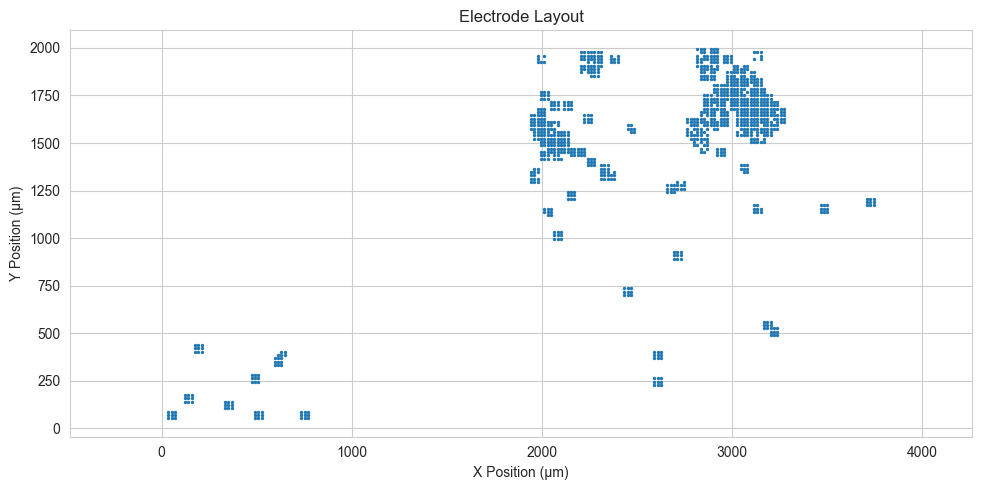

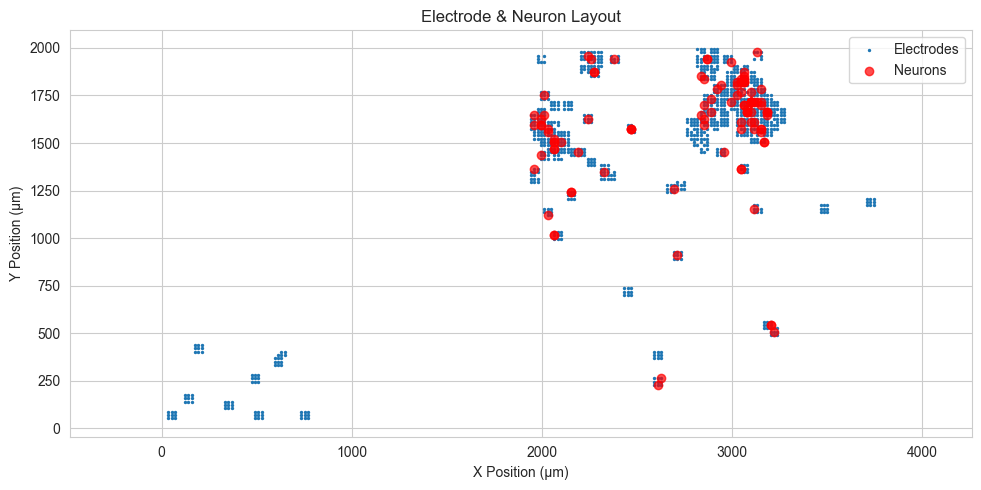

/Users/main_mac/data/org_eval/core/map_utils.py:159: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(decode_pos[:, 0], decode_pos[:, 1], c='g', label='Decode', s=60, marker='o',
/Users/main_mac/data/org_eval/core/map_utils.py:161: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(train_pos[:, 0], train_pos[:, 1], c='purple', label='Training', s=60, marker='s',


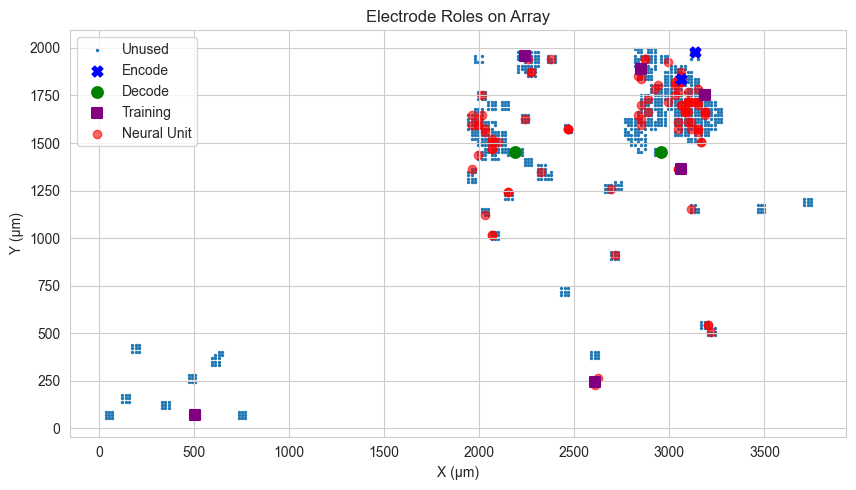

In [21]:
from core.map_utils import plot_electrode_layout, plot_neuron_layout, plot_architecture_map

# Plot all electrode locations
plot_electrode_layout(ole.metadata['mapping'])

# Plot neuron locations overlaid on electrode map
plot_neuron_layout(ole.metadata['mapping'], ole.metadata['spike_locs'])

# Plot architecture roles
plot_architecture_map(ole.metadata)


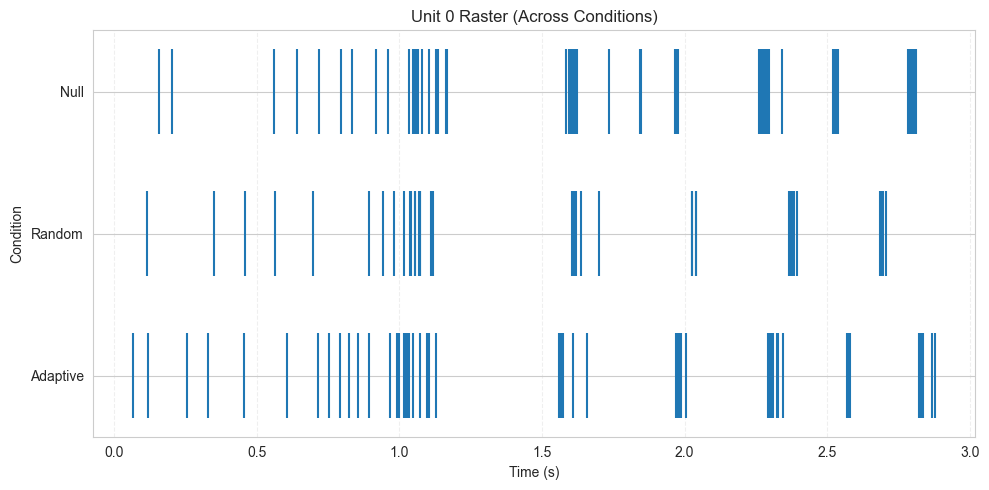

In [16]:
# shows comparative spiking activity of a specific neuron across conditions within the specified time range
ole.show_neuron_raster_comparison(unit_id=0, start_s=0, end_s=3)

In [30]:
ole.log_data["Adaptive"]["log"].head()
ole.log_data["Adaptive"]["pattern"].head()

time  reward stim_indices
0   3.911506    19.0       [4, 3]
1   4.019525    19.0       [4, 3]
2   4.128859    19.0       [4, 3]
3   4.237211    19.0       [4, 3]
4  18.771035    56.0       [6, 5]

/Users/main_mac/data/org_eval/core/map_utils.py:205: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(decode_pos[:, 0], decode_pos[:, 1], c='green', label='Decode', s=60,
/Users/main_mac/data/org_eval/core/map_utils.py:207: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(train_pos[:, 0], train_pos[:, 1], c='purple', label='Training', s=60,


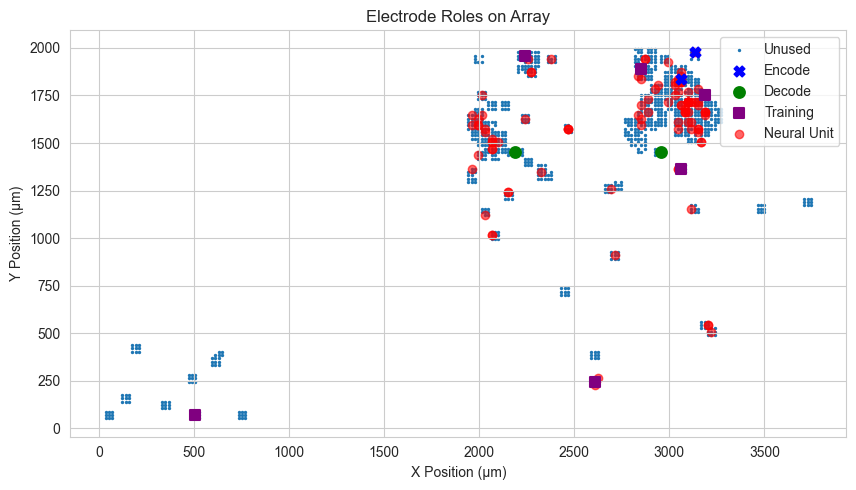

In [31]:
ole.show_combined_electrode_neuron_map()

In [17]:
# Compute latency histograms for all units in all conditions
ole.compute_latency_histograms(window_ms=30, bin_size=5, unit_ids=None)

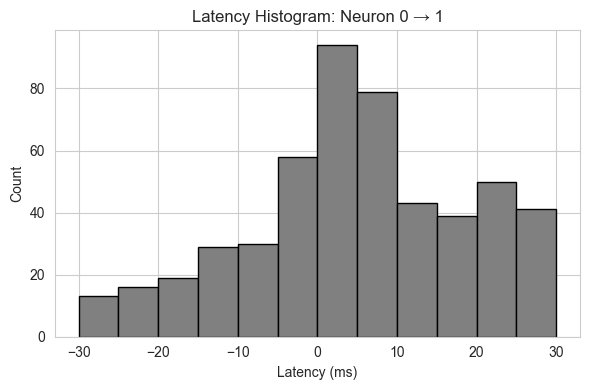

In [18]:
# Show histogram of latencies from unit j to i in a specific condition
ole.show_latency_histogram(condition="Adaptive", i=0, j=1)

In [22]:
# Compute causal matrices for a given condition and time window
ole.compute_causal_matrices(
    condition="Adaptive",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=200,
    bin_size=5,
    unit_ids=None
)


First-Order Weighted Latencies (±15 ms) — Causal Heatmap: Adaptive
  [0, 1] = 2.57 ms
  [0, 2] = -0.44 ms
  [0, 3] = 1.33 ms
  [0, 4] = 2.52 ms
  [0, 5] = 2.77 ms
  [0, 6] = 1.10 ms
  [0, 7] = 1.24 ms
  [0, 8] = -0.52 ms
  [0, 9] = 2.78 ms
  [0, 10] = 2.61 ms
  [0, 11] = 1.46 ms
  [0, 12] = 2.66 ms
  [0, 13] = 0.43 ms
  [0, 14] = -0.96 ms
  [0, 15] = -0.01 ms
  [0, 16] = 2.29 ms
  [0, 17] = 2.51 ms
  [0, 18] = 3.63 ms
  [0, 19] = 1.16 ms
  [0, 20] = -5.48 ms
  [0, 21] = -0.68 ms
  [0, 22] = 2.40 ms
  [0, 23] = 2.35 ms
  [0, 24] = 2.51 ms
  [0, 25] = -1.60 ms
  [0, 26] = 3.14 ms
  [0, 27] = 0.20 ms
  [0, 28] = 2.81 ms
  [0, 29] = 4.15 ms
  [0, 30] = 1.05 ms
  [0, 31] = 2.83 ms
  [0, 32] = 2.47 ms
  [0, 33] = 2.65 ms
  [0, 34] = -0.06 ms
  [0, 35] = 3.49 ms
  [0, 36] = 2.50 ms
  [0, 37] = 5.00 ms
  [0, 38] = 1.13 ms
  [0, 39] = 3.70 ms
  [0, 40] = 0.08 ms
  [0, 41] = -1.85 ms
  [0, 42] = -1.29 ms
  [0, 43] = 0.07 ms
  [0, 44] = 7.77 ms
  [0, 45] = 4.09 ms
  [0, 46] = 2.91 ms
  [0, 47] =

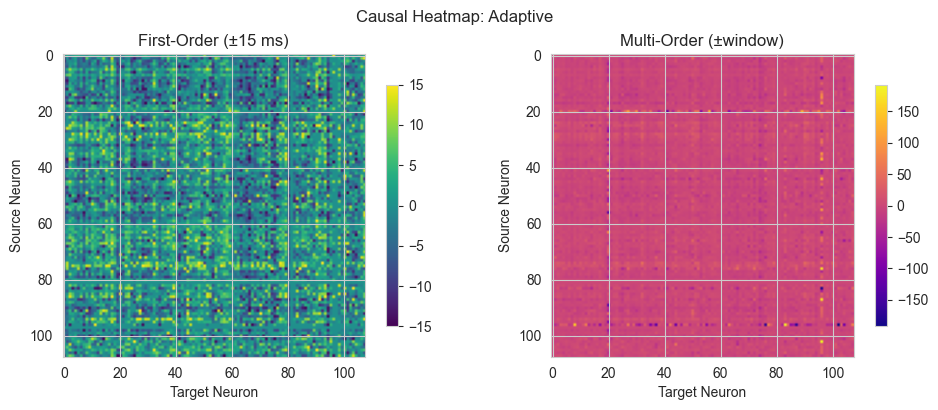

In [23]:
# Show heatmaps for first- and multi-order causal matrices
first, multi = ole.causal_latency_matrices[("Adaptive", 0, 900000)], ole.multi_order_matrices[("Adaptive", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Adaptive", unit_ids=None)

In [25]:
# Compute and cache firing order using the first-order matrix
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Adaptive", label="first_order")

In [26]:
# === Get STTC matrix over the same window ===
sd = ole.spike_data["Adaptive"].subtime(0, 900000)
subset_sd = sd.subset(firing_order)
sttc_matrix = subset_sd.spike_time_tilings()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

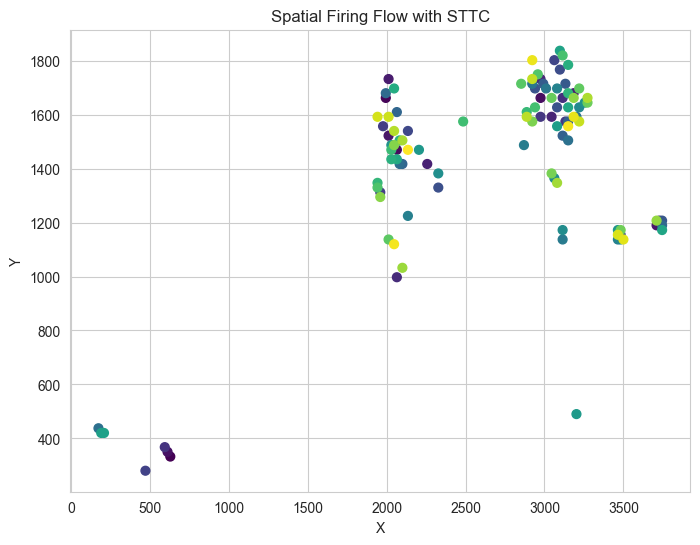

In [30]:
# === Plot spatial arrows with STTC coloring ===
summary_df = ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix,
    title="Spatial Firing Flow with STTC",
    arrow_width=0.004
)


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Baseline (0–5 min)
  [0, 2] = 3.66 ms
  [0, 3] = 7.14 ms
  [0, 4] = -10.02 ms
  [0, 5] = 13.81 ms
  [1, 0] = 9.45 ms
  [1, 2] = 1.98 ms
  [1, 3] = 2.40 ms
  [1, 4] = -0.21 ms
  [1, 5] = 8.84 ms
  [2, 1] = -4.16 ms
  [2, 3] = 10.13 ms
  [2, 4] = -7.98 ms
  [2, 5] = -0.12 ms
  [3, 2] = -0.67 ms
  [3, 4] = -3.54 ms
  [3, 5] = 8.58 ms
  [4, 0] = 10.46 ms
  [4, 1] = 1.18 ms
  [4, 2] = 3.85 ms
  [4, 3] = 1.01 ms
  [4, 5] = 3.43 ms
  [5, 1] = -8.23 ms
  [5, 2] = -0.75 ms
  [5, 3] = -13.40 ms
  [5, 4] = -2.90 ms


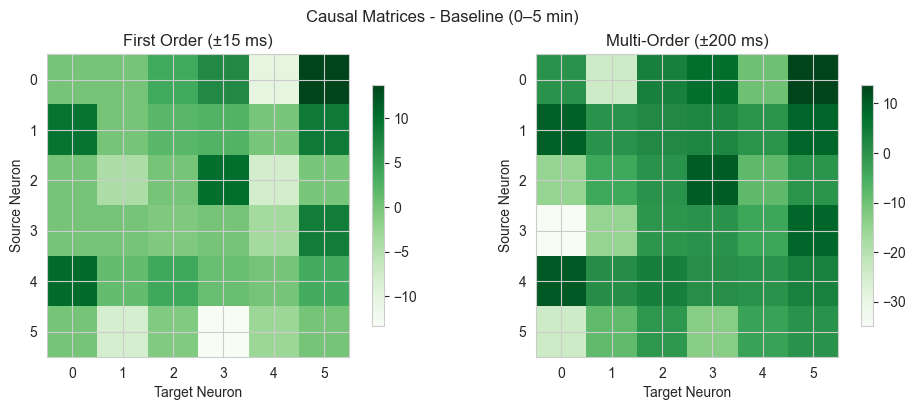


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Adaptive (0–5 min)
  [0, 2] = 0.39 ms
  [0, 3] = 11.61 ms
  [0, 4] = 5.64 ms
  [0, 5] = 1.01 ms
  [1, 0] = 2.59 ms
  [1, 2] = 5.67 ms
  [1, 3] = 7.19 ms
  [1, 4] = -3.05 ms
  [1, 5] = 2.26 ms
  [2, 0] = -11.73 ms
  [2, 1] = -2.27 ms
  [2, 3] = 0.58 ms
  [2, 4] = -9.66 ms
  [2, 5] = -8.36 ms
  [3, 1] = 5.30 ms
  [3, 2] = -4.46 ms
  [3, 4] = -5.96 ms
  [3, 5] = -2.69 ms
  [4, 0] = -8.45 ms
  [4, 1] = 7.81 ms
  [4, 2] = 0.57 ms
  [4, 3] = 1.34 ms
  [4, 5] = 7.39 ms
  [5, 0] = -8.14 ms
  [5, 1] = 2.29 ms
  [5, 2] = 5.73 ms
  [5, 3] = -2.50 ms
  [5, 4] = -10.31 ms


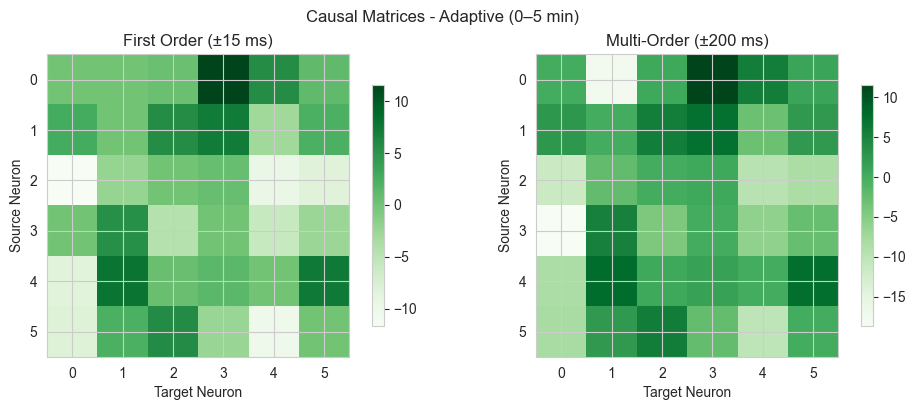


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Random (0–5 min)
  [0, 1] = 1.61 ms
  [0, 2] = -3.04 ms
  [0, 3] = 11.74 ms
  [0, 4] = 0.69 ms
  [0, 5] = 1.68 ms
  [1, 0] = -0.98 ms
  [1, 2] = 1.31 ms
  [1, 3] = 10.47 ms
  [1, 4] = -8.00 ms
  [1, 5] = 1.38 ms
  [2, 0] = -1.57 ms
  [2, 1] = 1.63 ms
  [2, 3] = 10.27 ms
  [2, 4] = -5.72 ms
  [2, 5] = -2.40 ms
  [3, 1] = -13.48 ms
  [3, 4] = -9.96 ms
  [3, 5] = -7.56 ms
  [4, 0] = 3.64 ms
  [4, 1] = 11.59 ms
  [4, 2] = -6.43 ms
  [4, 3] = 3.65 ms
  [4, 5] = 3.91 ms
  [5, 0] = -6.36 ms
  [5, 1] = 0.55 ms
  [5, 2] = -4.40 ms
  [5, 3] = 2.39 ms
  [5, 4] = -3.02 ms


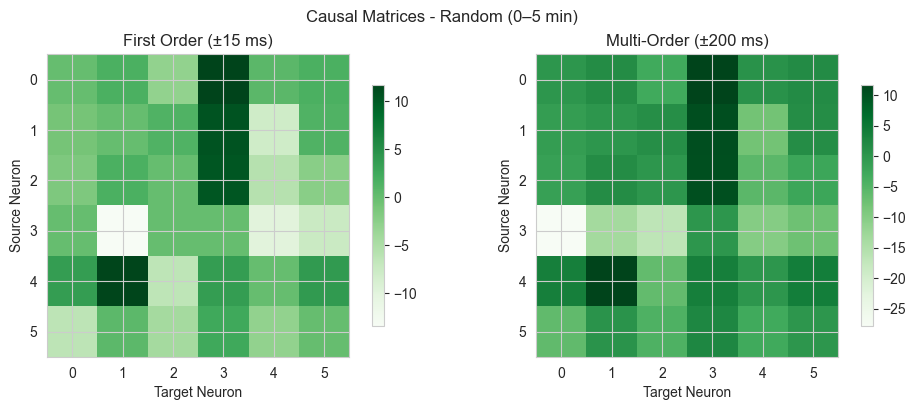


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Null (0–5 min)
  [0, 1] = -5.69 ms
  [0, 2] = -1.21 ms
  [0, 3] = 7.29 ms
  [0, 4] = -1.22 ms
  [0, 5] = -0.98 ms
  [1, 0] = -3.25 ms
  [1, 2] = -1.33 ms
  [1, 3] = 11.38 ms
  [1, 4] = -7.32 ms
  [1, 5] = 0.45 ms
  [2, 0] = -14.14 ms
  [2, 1] = 0.83 ms
  [2, 3] = -1.79 ms
  [2, 4] = -9.59 ms
  [2, 5] = 4.53 ms
  [3, 0] = -7.58 ms
  [3, 1] = -13.60 ms
  [3, 2] = -2.50 ms
  [3, 4] = -10.83 ms
  [3, 5] = -1.73 ms
  [4, 0] = 0.49 ms
  [4, 1] = 9.10 ms
  [4, 2] = 9.19 ms
  [4, 3] = 6.35 ms
  [4, 5] = -3.01 ms
  [5, 0] = -7.64 ms
  [5, 1] = -0.70 ms
  [5, 2] = -3.94 ms
  [5, 3] = 4.03 ms
  [5, 4] = -4.64 ms


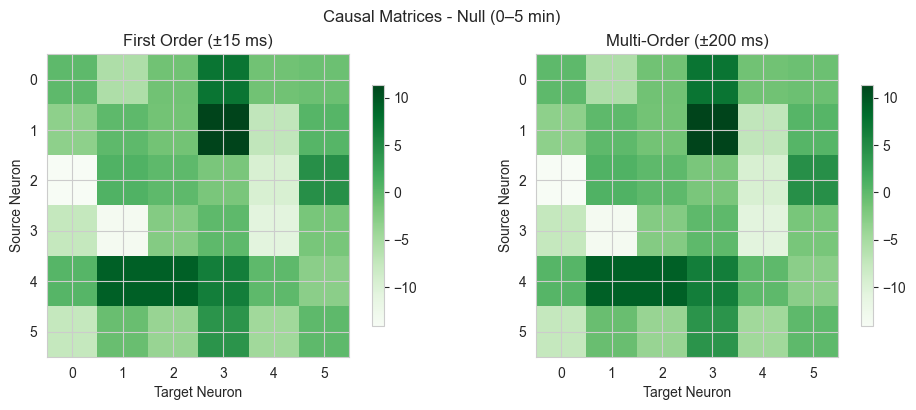

In [54]:
# Compute all causal matrices (first 5 min) — restricted to training neurons
training_inds = ole.metadata["training_inds"]
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(cond, start_ms=0, end_ms=300000, neuron_ids=training_inds)

# Show causal plots for each condition (restricted to training neurons)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    first = ole.causal_latency_matrices[(cond, 0, 300000)]
    multi = ole.multi_order_matrices[(cond, 0, 300000)]
    ole.show_causal_plot_from_matrices(first, multi,
                                       title=f"Causal Matrices - {cond} (0–5 min)",
                                       inds=training_inds)


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Baseline (10–15 min)


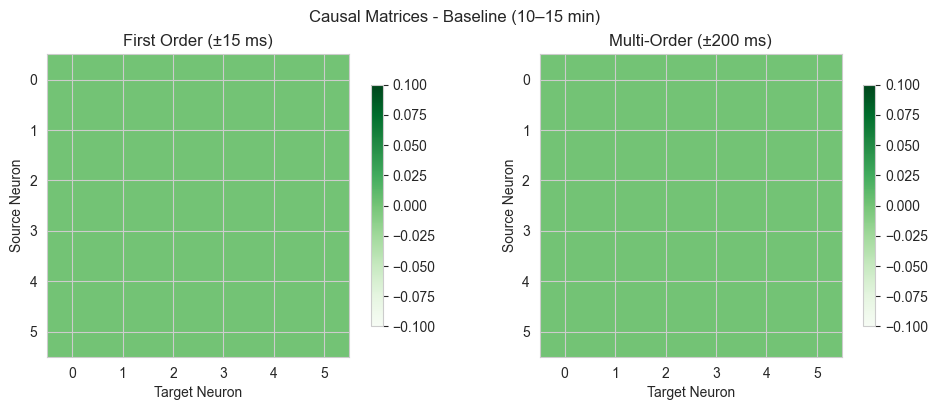


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Adaptive (10–15 min)
  [0, 1] = 10.95 ms
  [0, 2] = -10.21 ms
  [1, 0] = -6.19 ms
  [1, 2] = -1.61 ms
  [1, 3] = -1.62 ms
  [1, 4] = -11.32 ms
  [1, 5] = -8.16 ms
  [2, 1] = 1.67 ms
  [2, 3] = -1.42 ms
  [2, 4] = -8.24 ms
  [2, 5] = 1.51 ms
  [3, 1] = 2.66 ms
  [3, 2] = 4.94 ms
  [3, 4] = -11.71 ms
  [3, 5] = -14.78 ms
  [4, 0] = 9.32 ms
  [4, 2] = 10.41 ms
  [4, 3] = 13.22 ms
  [4, 5] = 0.93 ms
  [5, 1] = 4.03 ms
  [5, 2] = 1.68 ms
  [5, 3] = 9.59 ms
  [5, 4] = -6.41 ms


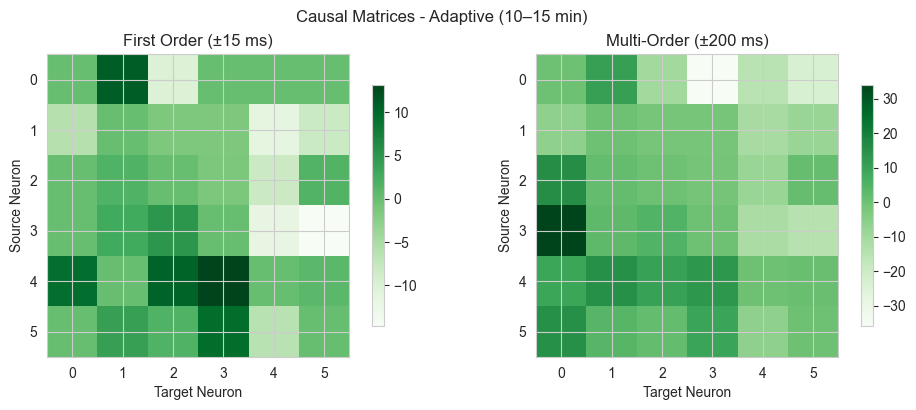


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Random (10–15 min)
  [0, 1] = -0.33 ms
  [0, 2] = -1.18 ms
  [0, 3] = -2.69 ms
  [0, 4] = -3.94 ms
  [0, 5] = 8.72 ms
  [1, 0] = 4.48 ms
  [1, 2] = 1.08 ms
  [1, 3] = 8.62 ms
  [1, 4] = -4.45 ms
  [1, 5] = 1.66 ms
  [2, 0] = 9.07 ms
  [2, 1] = -1.38 ms
  [2, 3] = -8.03 ms
  [2, 4] = -4.20 ms
  [2, 5] = 0.72 ms
  [3, 0] = 5.18 ms
  [3, 1] = -9.47 ms
  [3, 2] = 1.99 ms
  [3, 4] = -6.15 ms
  [3, 5] = -1.48 ms
  [4, 0] = 4.55 ms
  [4, 1] = 4.20 ms
  [4, 2] = 5.78 ms
  [4, 3] = 5.53 ms
  [4, 5] = 1.59 ms
  [5, 0] = -6.47 ms
  [5, 1] = 2.89 ms
  [5, 2] = 5.72 ms
  [5, 3] = 1.87 ms
  [5, 4] = 1.59 ms


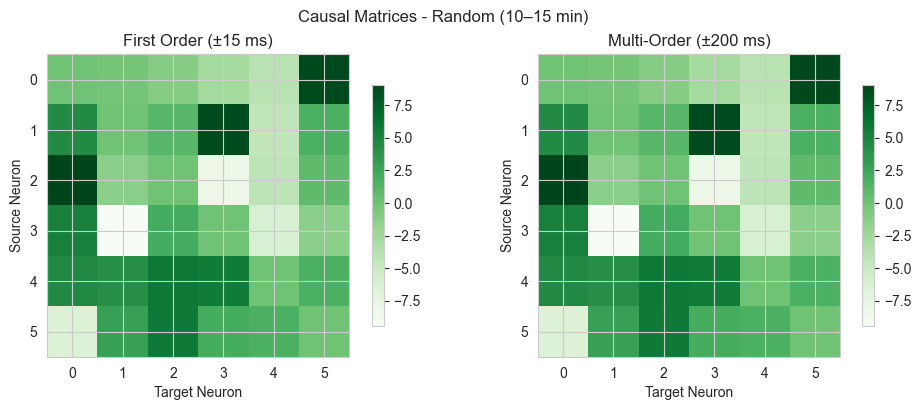


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Null (10–15 min)
  [0, 1] = -14.12 ms
  [0, 2] = 0.90 ms
  [0, 3] = 9.71 ms
  [0, 4] = -5.61 ms
  [0, 5] = -0.69 ms
  [1, 0] = -1.10 ms
  [1, 2] = 3.62 ms
  [1, 3] = -0.17 ms
  [1, 4] = -1.46 ms
  [1, 5] = -0.51 ms
  [2, 0] = 7.08 ms
  [2, 1] = 2.75 ms
  [2, 3] = 1.18 ms
  [2, 4] = -5.29 ms
  [2, 5] = 1.12 ms
  [3, 0] = -3.19 ms
  [3, 1] = -2.25 ms
  [3, 2] = -3.34 ms
  [3, 4] = 4.94 ms
  [3, 5] = 2.70 ms
  [4, 0] = 10.80 ms
  [4, 1] = 1.41 ms
  [4, 2] = 3.00 ms
  [4, 3] = -3.06 ms
  [4, 5] = 3.97 ms
  [5, 0] = 0.05 ms
  [5, 1] = 5.30 ms
  [5, 2] = 6.52 ms
  [5, 3] = -6.06 ms
  [5, 4] = -2.41 ms


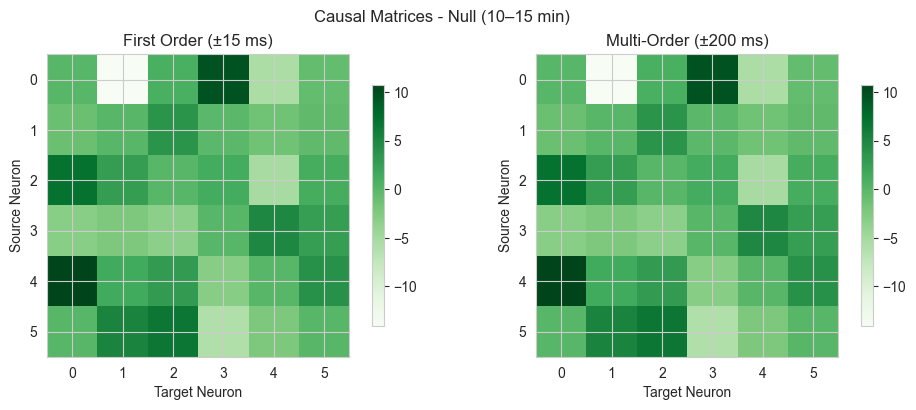

In [55]:
# Compute all causal matrices (first 5 min) — restricted to training neurons
training_inds = ole.metadata["training_inds"]
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(cond, start_ms=600000, end_ms=900000, neuron_ids=training_inds)

# Show causal plots for each condition (restricted to training neurons)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    first = ole.causal_latency_matrices[(cond, 600000, 900000)]
    multi = ole.multi_order_matrices[(cond, 600000, 900000)]
    ole.show_causal_plot_from_matrices(first, multi,
                                       title=f"Causal Matrices - {cond} (10–15 min)",
                                       inds=training_inds)

In [25]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_firing_order_overlay(cond, start_ms=0, end_ms=300000)

[WARNING] No task neuron indices available. Skipping plot.
[WARNING] No task neuron indices available. Skipping plot.
[WARNING] No task neuron indices available. Skipping plot.
[WARNING] No task neuron indices available. Skipping plot.


In [56]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_firing_order_overlay(cond, start_ms=600000, end_ms=900000)

[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.
[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.
[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.
[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.


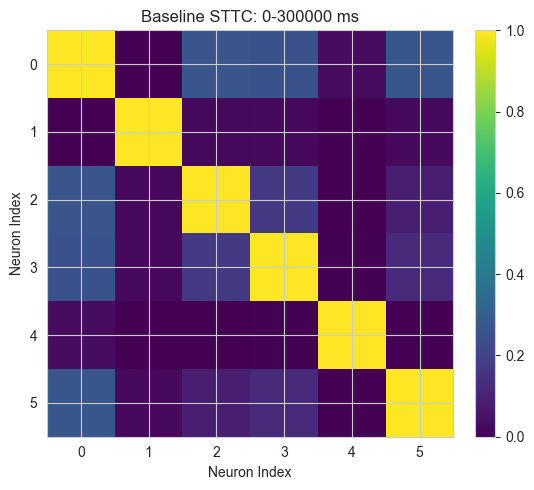

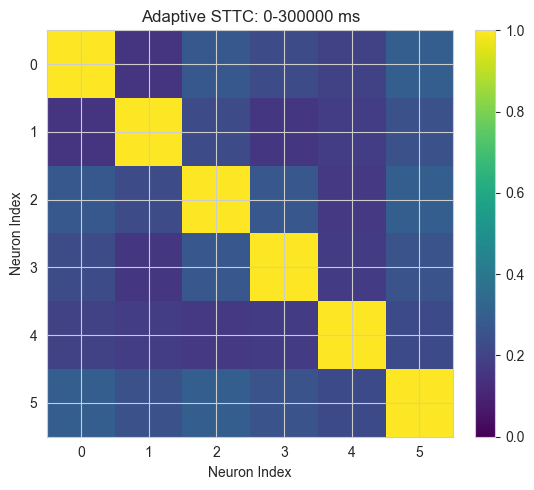

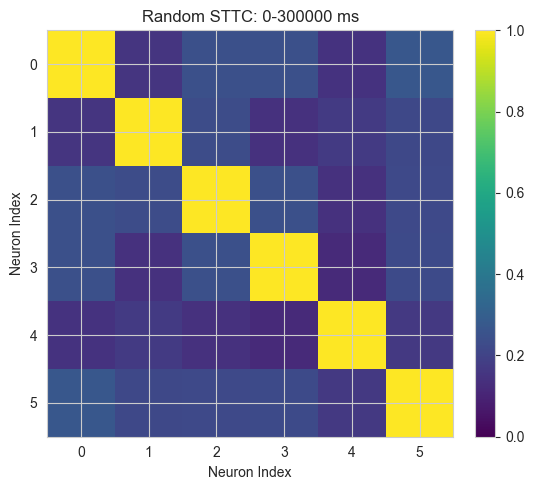

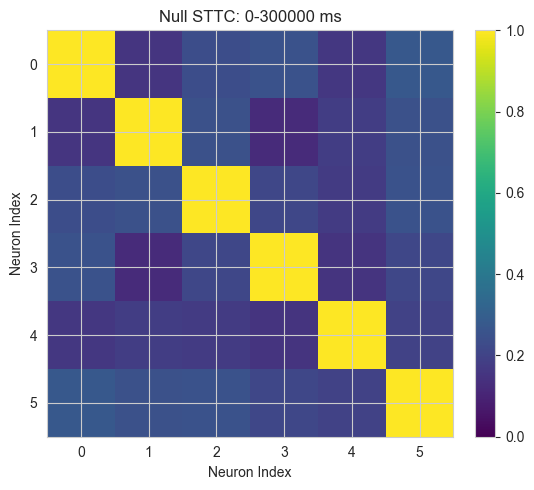

In [36]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_matrix_overlay(cond, start_ms=0, end_ms=300000)

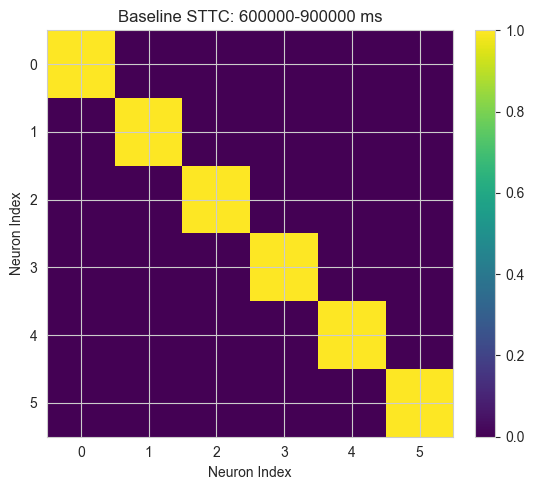

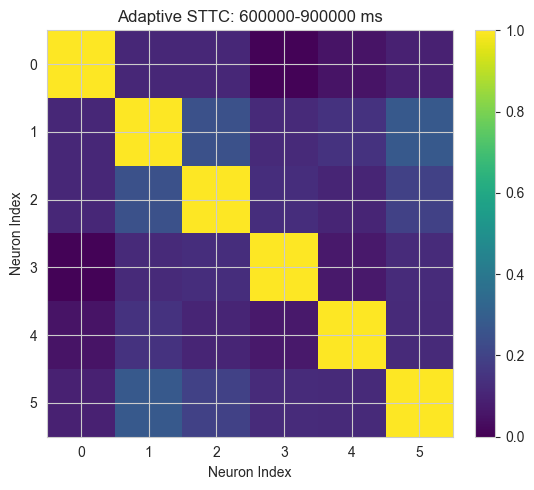

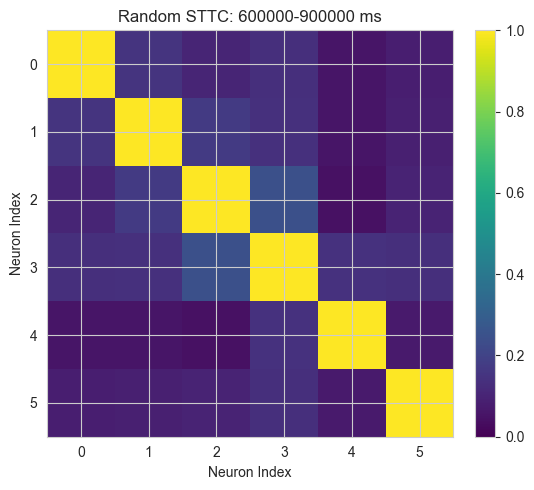

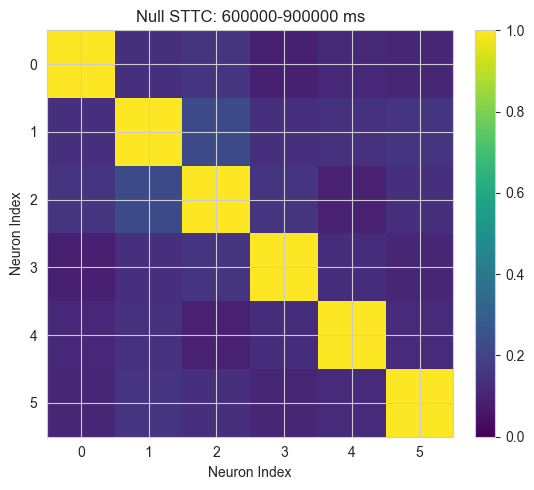

In [37]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_matrix_overlay(cond, start_ms=600000, end_ms=900000)

Max STTC: 1.0
STTC[0, 1] = -0.03
STTC[0, 2] = 0.26
STTC[0, 3] = 0.25
STTC[0, 4] = 0.03
STTC[0, 5] = 0.27
STTC[1, 2] = 0.02
STTC[1, 3] = 0.03
STTC[1, 4] = -0.01
STTC[1, 5] = 0.02
STTC[2, 3] = 0.17
STTC[2, 4] = -0.07
STTC[2, 5] = 0.08
STTC[3, 4] = 0.01
STTC[3, 5] = 0.12
STTC[4, 5] = -0.02


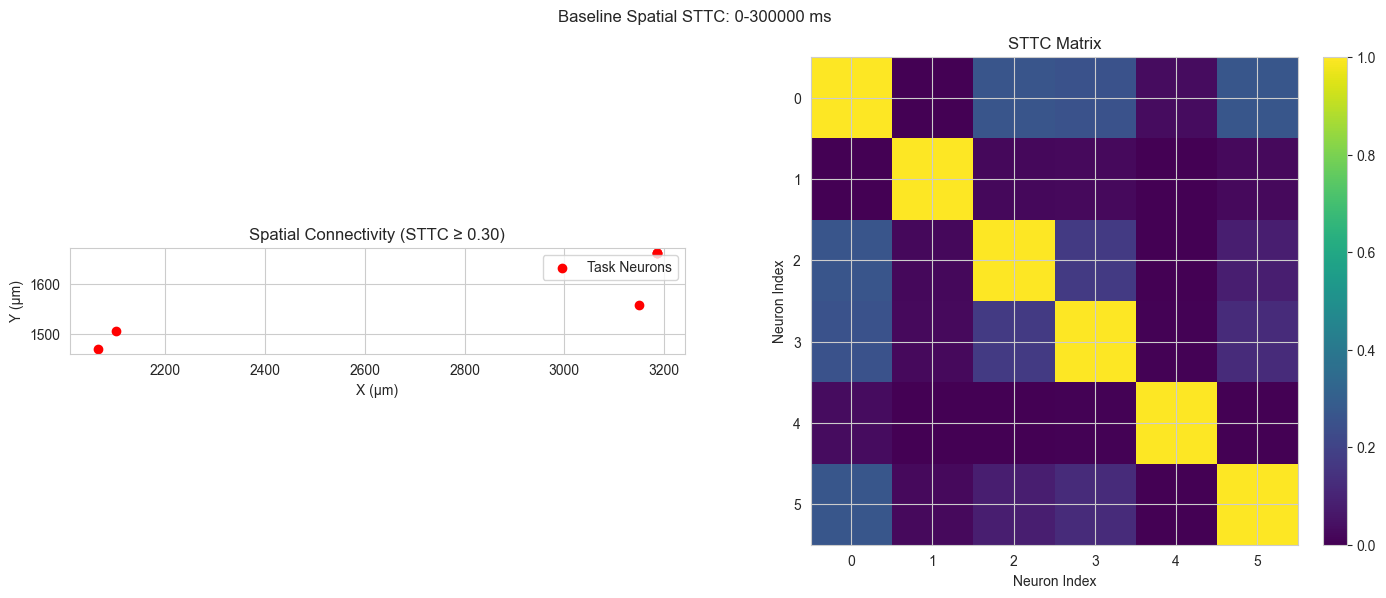

Max STTC: 1.0
STTC[0, 1] = 0.15
STTC[0, 2] = 0.28
STTC[0, 3] = 0.23
STTC[0, 4] = 0.20
STTC[0, 5] = 0.30
STTC[1, 2] = 0.23
STTC[1, 3] = 0.16
STTC[1, 4] = 0.18
STTC[1, 5] = 0.25
STTC[2, 3] = 0.27
STTC[2, 4] = 0.17
STTC[2, 5] = 0.30
STTC[3, 4] = 0.18
STTC[3, 5] = 0.26
STTC[4, 5] = 0.22


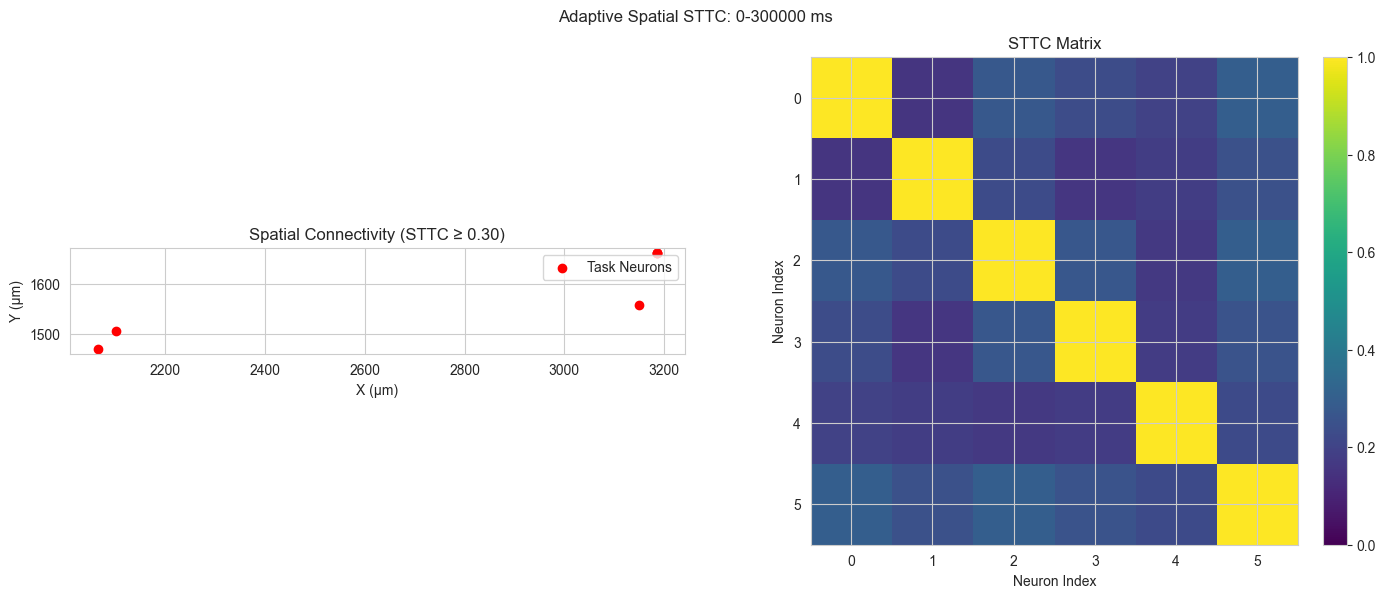

Max STTC: 1.0
STTC[0, 1] = 0.15
STTC[0, 2] = 0.25
STTC[0, 3] = 0.25
STTC[0, 4] = 0.15
STTC[0, 5] = 0.27
STTC[1, 2] = 0.23
STTC[1, 3] = 0.14
STTC[1, 4] = 0.17
STTC[1, 5] = 0.22
STTC[2, 3] = 0.24
STTC[2, 4] = 0.14
STTC[2, 5] = 0.22
STTC[3, 4] = 0.12
STTC[3, 5] = 0.23
STTC[4, 5] = 0.17


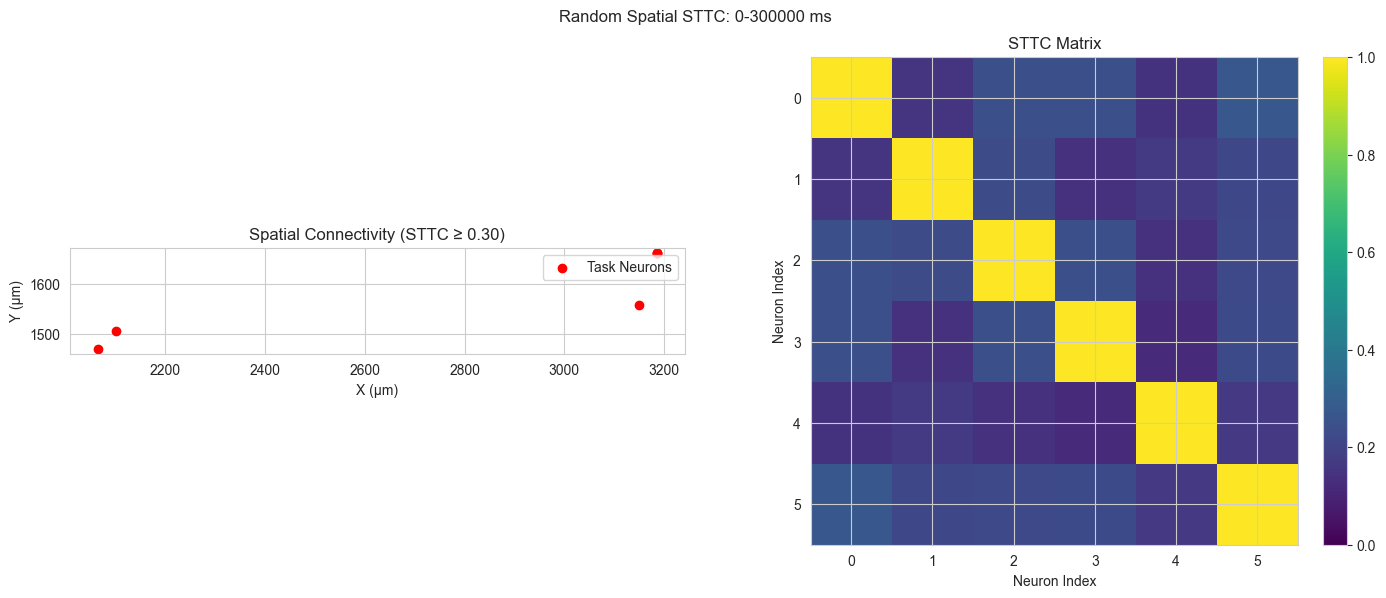

Max STTC: 1.0
STTC[0, 1] = 0.16
STTC[0, 2] = 0.23
STTC[0, 3] = 0.25
STTC[0, 4] = 0.16
STTC[0, 5] = 0.27
STTC[1, 2] = 0.25
STTC[1, 3] = 0.12
STTC[1, 4] = 0.18
STTC[1, 5] = 0.25
STTC[2, 3] = 0.21
STTC[2, 4] = 0.17
STTC[2, 5] = 0.25
STTC[3, 4] = 0.15
STTC[3, 5] = 0.21
STTC[4, 5] = 0.20


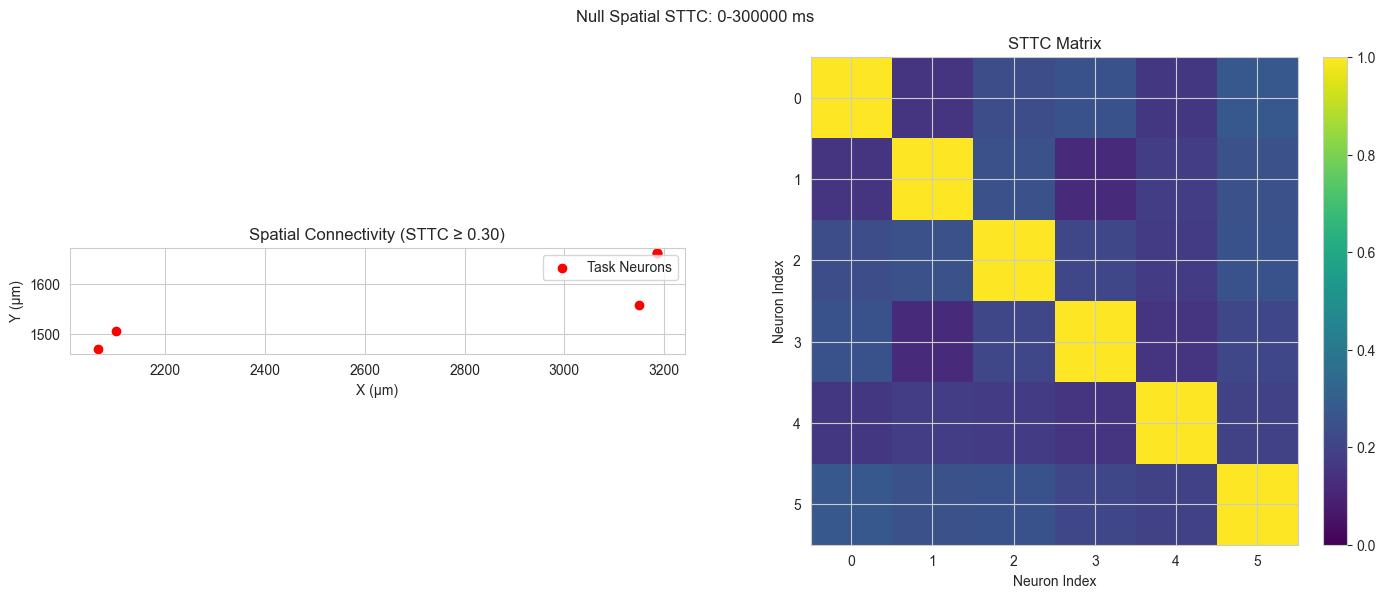

In [38]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_spatial_overlay(cond, start_ms=0, end_ms=300000, threshold=0.3)

Max STTC: 1.0
STTC[0, 1] = 0.00
STTC[0, 2] = 0.00
STTC[0, 3] = 0.00
STTC[0, 4] = 0.00
STTC[0, 5] = 0.00
STTC[1, 2] = 0.00
STTC[1, 3] = 0.00
STTC[1, 4] = 0.00
STTC[1, 5] = 0.00
STTC[2, 3] = 0.00
STTC[2, 4] = 0.00
STTC[2, 5] = 0.00
STTC[3, 4] = 0.00
STTC[3, 5] = 0.00
STTC[4, 5] = 0.00


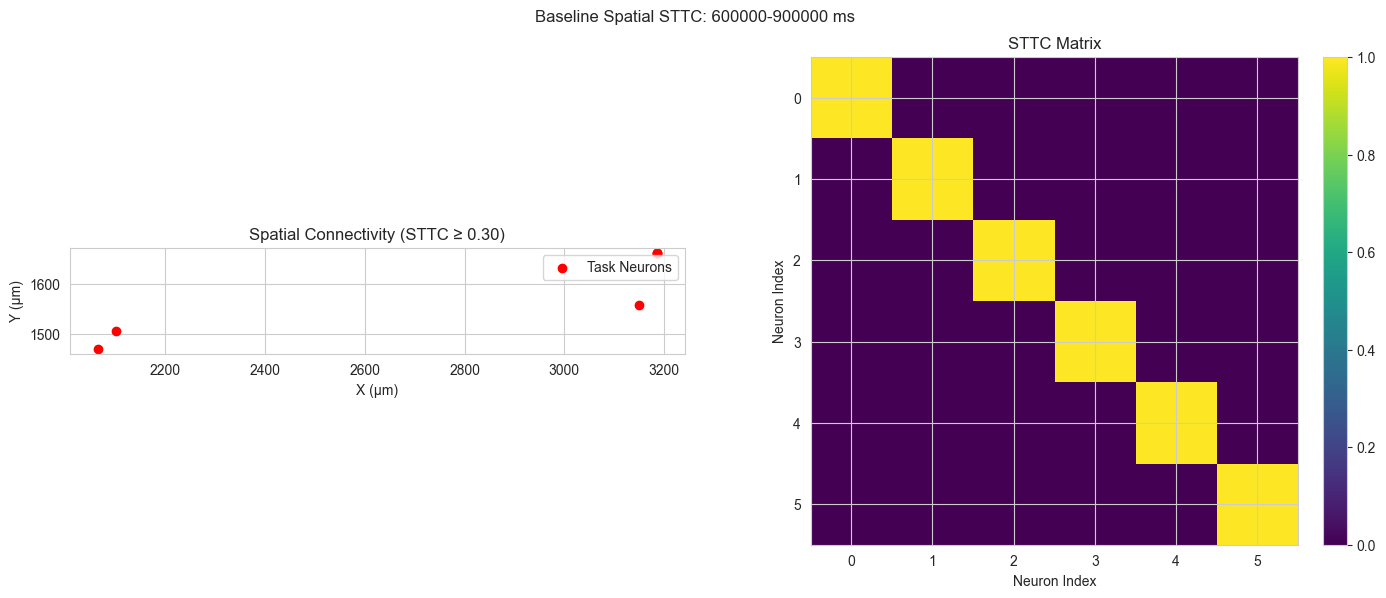

Max STTC: 1.0
STTC[0, 1] = 0.11
STTC[0, 2] = 0.11
STTC[0, 3] = 0.01
STTC[0, 4] = 0.05
STTC[0, 5] = 0.09
STTC[1, 2] = 0.25
STTC[1, 3] = 0.12
STTC[1, 4] = 0.15
STTC[1, 5] = 0.28
STTC[2, 3] = 0.13
STTC[2, 4] = 0.10
STTC[2, 5] = 0.19
STTC[3, 4] = 0.07
STTC[3, 5] = 0.12
STTC[4, 5] = 0.12


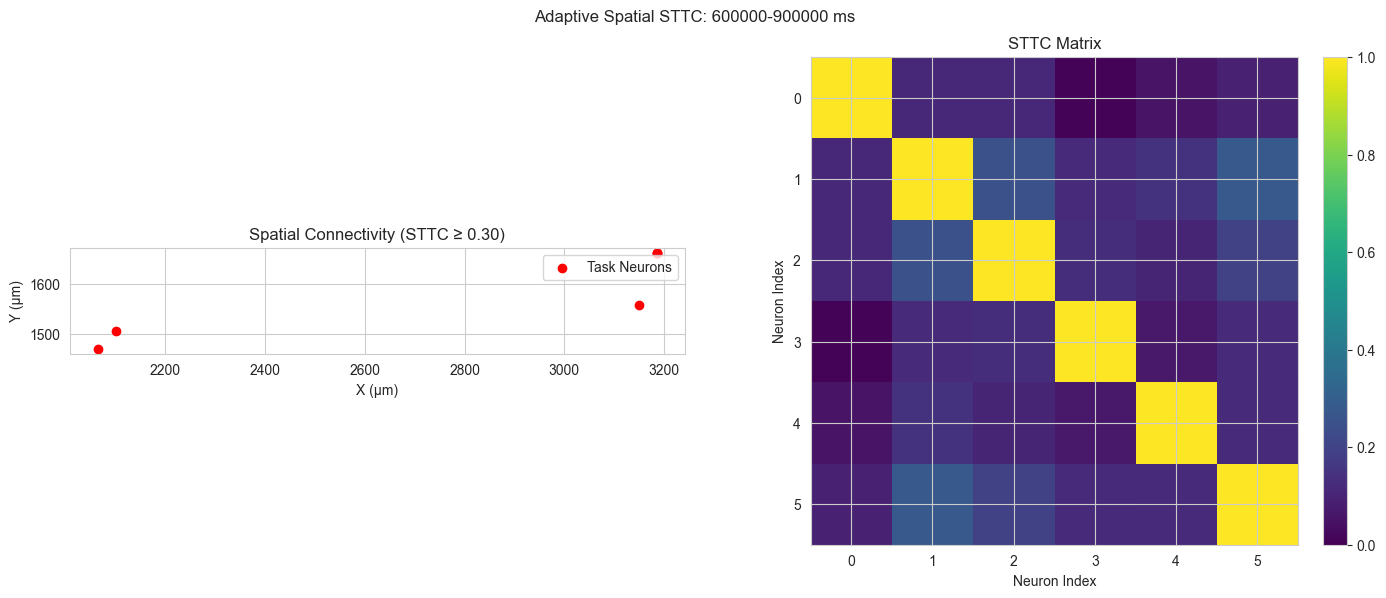

Max STTC: 1.0
STTC[0, 1] = 0.15
STTC[0, 2] = 0.10
STTC[0, 3] = 0.14
STTC[0, 4] = 0.06
STTC[0, 5] = 0.08
STTC[1, 2] = 0.17
STTC[1, 3] = 0.14
STTC[1, 4] = 0.05
STTC[1, 5] = 0.09
STTC[2, 3] = 0.24
STTC[2, 4] = 0.05
STTC[2, 5] = 0.10
STTC[3, 4] = 0.14
STTC[3, 5] = 0.13
STTC[4, 5] = 0.07


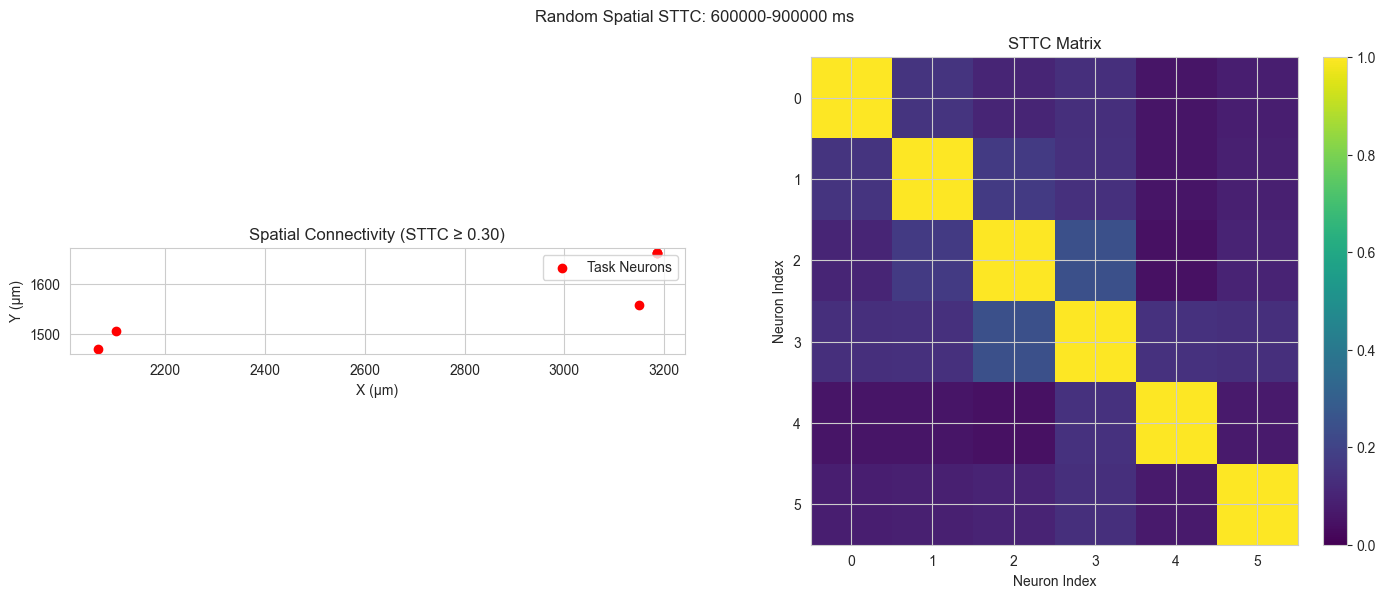

Max STTC: 1.0
STTC[0, 1] = 0.14
STTC[0, 2] = 0.15
STTC[0, 3] = 0.09
STTC[0, 4] = 0.11
STTC[0, 5] = 0.11
STTC[1, 2] = 0.23
STTC[1, 3] = 0.14
STTC[1, 4] = 0.14
STTC[1, 5] = 0.15
STTC[2, 3] = 0.15
STTC[2, 4] = 0.09
STTC[2, 5] = 0.14
STTC[3, 4] = 0.13
STTC[3, 5] = 0.11
STTC[4, 5] = 0.12


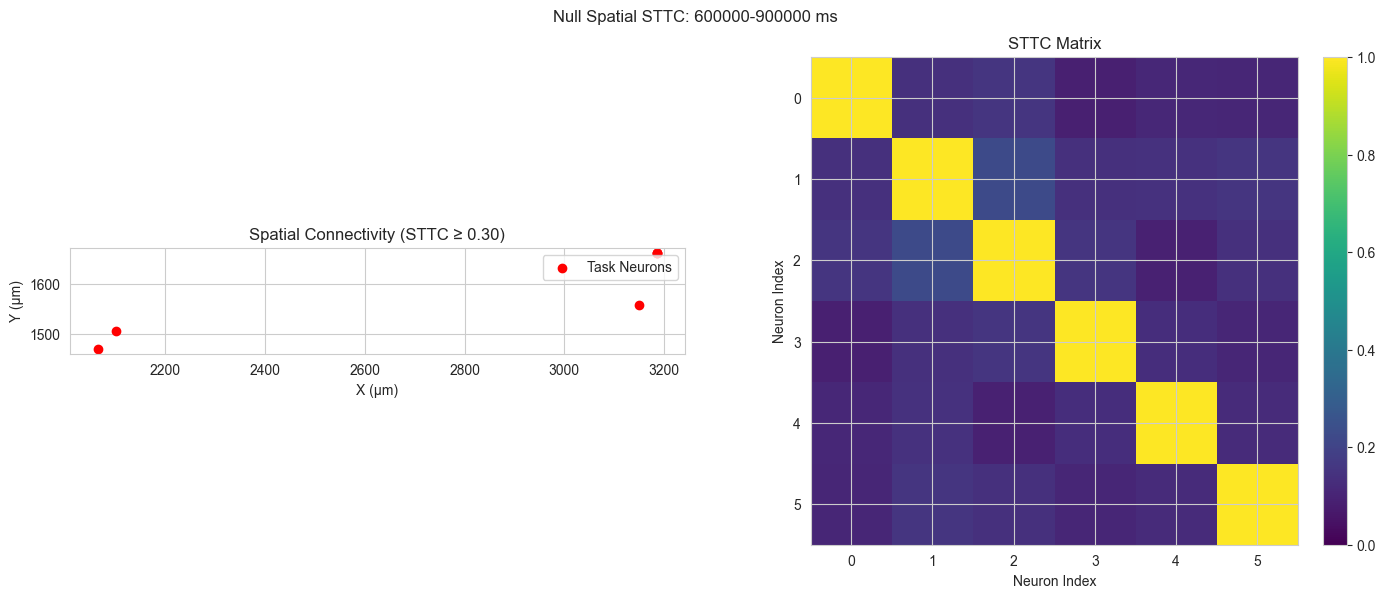

In [39]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_spatial_overlay(cond, start_ms=600000, end_ms=900000, threshold=0.3)

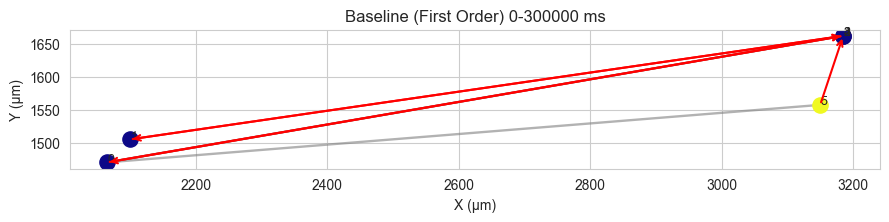

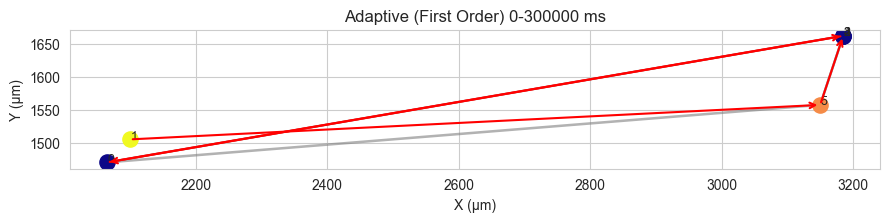

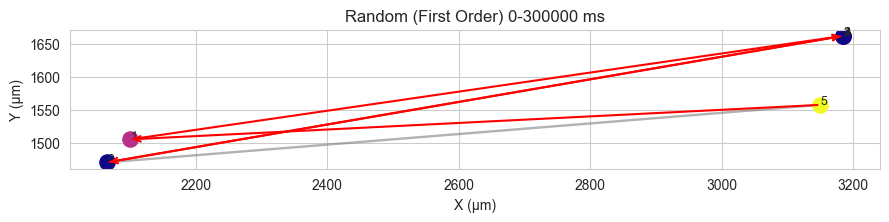

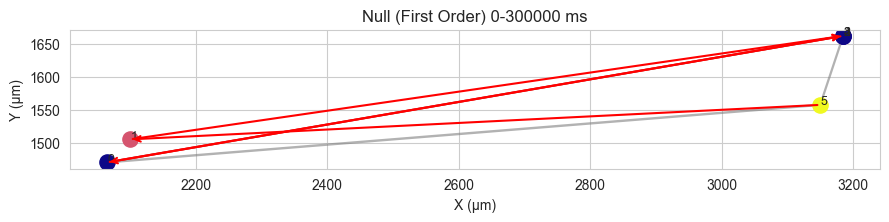

In [40]:
# Generate combined firing + STTC overlay plots for each condition (0–5 min)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_sttc_for_condition(cond, start_ms=0, end_ms=300000)  # ensure STTC is computed
    ole.show_combined_firing_sttc_overlay(
        condition=cond,
        start_ms=0,
        end_ms=300000,
        order="first",              # or "multi" if you want multi-order causality
        top_n=None,                 # use all training neurons
        sttc_threshold=0.25         # only draw STTC connections above this strength
    )


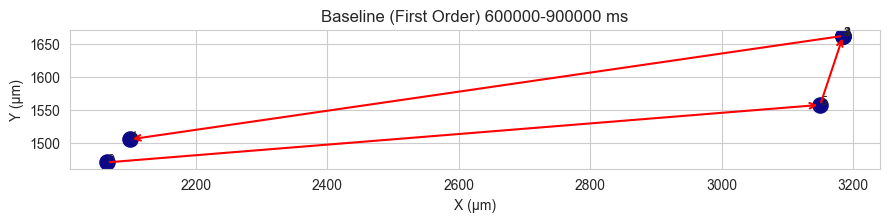

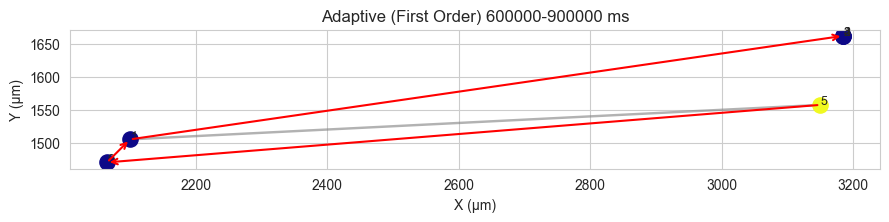

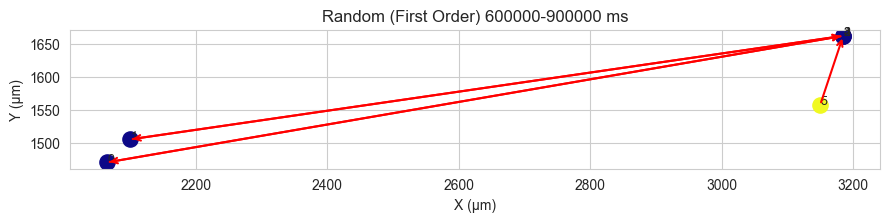

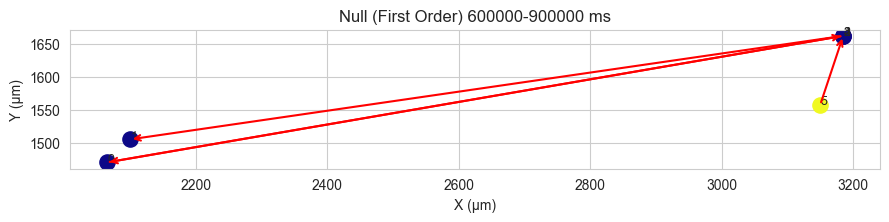

In [41]:
# Generate combined firing + STTC overlay plots for each condition (0–5 min)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_sttc_for_condition(cond, start_ms=600000, end_ms=900000)  # ensure STTC is computed
    ole.show_combined_firing_sttc_overlay(
        condition=cond,
        start_ms=600000,
        end_ms=900000,
        order="first",              # or "multi" if you want multi-order causality
        top_n=None,                 # use all training neurons
        sttc_threshold=0.25         # only draw STTC connections above this strength
    )


In [ ]:
# Define the time window and comparison settings
start_ms = 0  # e.g., 10 min
end_ms = 300000    # e.g., 15 min
order = "first"    # or "multi"

# Run comparison for two conditions
diff_matrix, stats = ole.compare_causal_matrices("Baseline", "Adaptive",
                                                 order=order,
                                                 start_ms=start_ms,
                                                 end_ms=end_ms,
                                                 show_plot=True)

In [ ]:
# Print summary statistics of the difference matrix
print("Causal Matrix Comparison (Baseline → Adaptive):")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")

# Convert to DataFrame for visual inspection (optional)
diff_df = pd.DataFrame(diff_matrix)
diff_df.style.background_gradient(cmap="bwr", axis=None)

In [ ]:
# Define time window and comparison settings
start_ms = 600000  # e.g., 10 min
end_ms = 900000    # e.g., 15 min
order = "first"    # or "multi"

# Run comparison for two conditions
diff_matrix, stats = ole.compare_causal_matrices("Baseline", "Adaptive",
                                                 order=order,
                                                 start_ms=start_ms,
                                                 end_ms=end_ms,
                                                 show_plot=True)

In [ ]:
# Print summary statistics of the difference matrix
print("Causal Matrix Comparison (Baseline → Adaptive):")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")

# Convert to DataFrame for visual inspection (optional)
diff_df = pd.DataFrame(diff_matrix)
diff_df.style.background_gradient(cmap="bwr", axis=None)

In [ ]:
df_sttc_timecourse = OrgLearningEval.plot_sttc_over_time(
    ole,
    conditions=["Baseline", "Adaptive", "Random", "Null"],
    window_ms=60000,   # 1-minute windows
    step_ms=30000      # 30-second steps
)

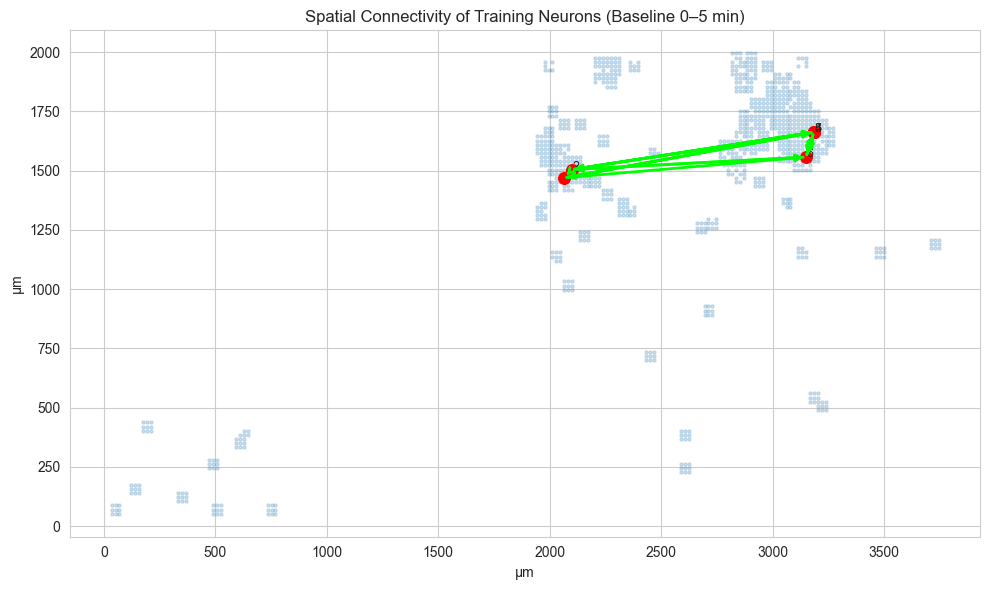

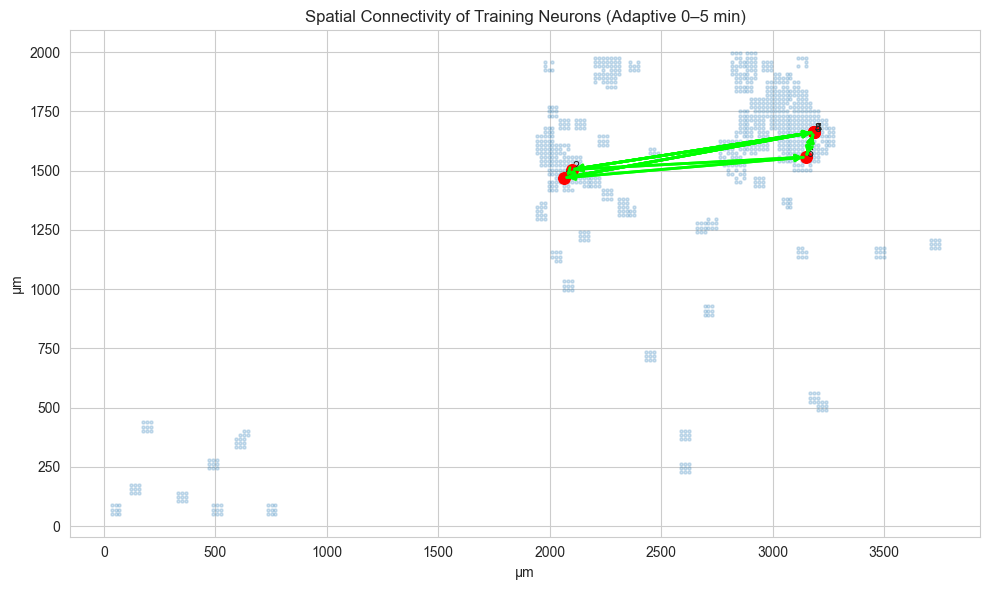

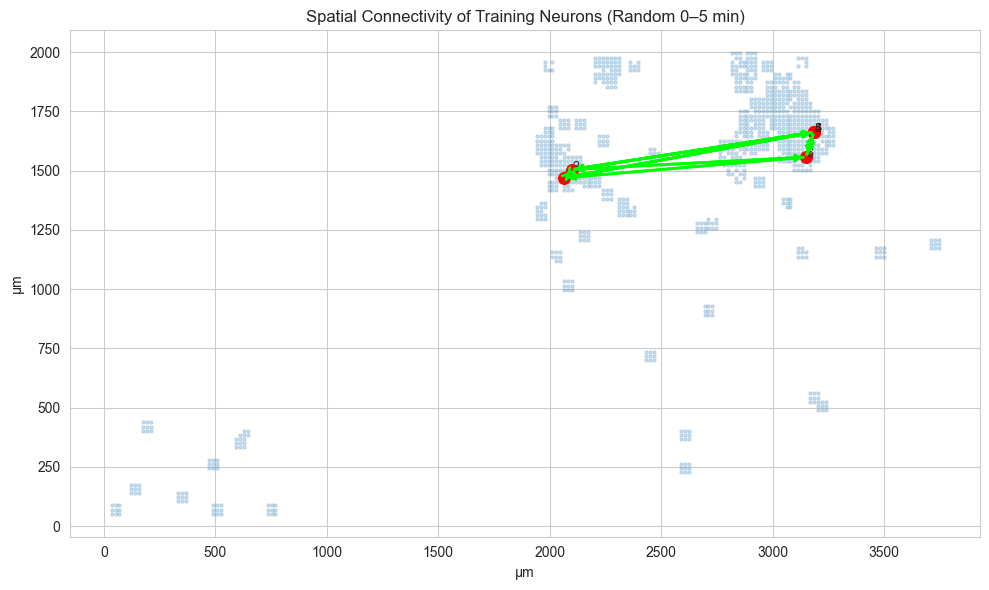

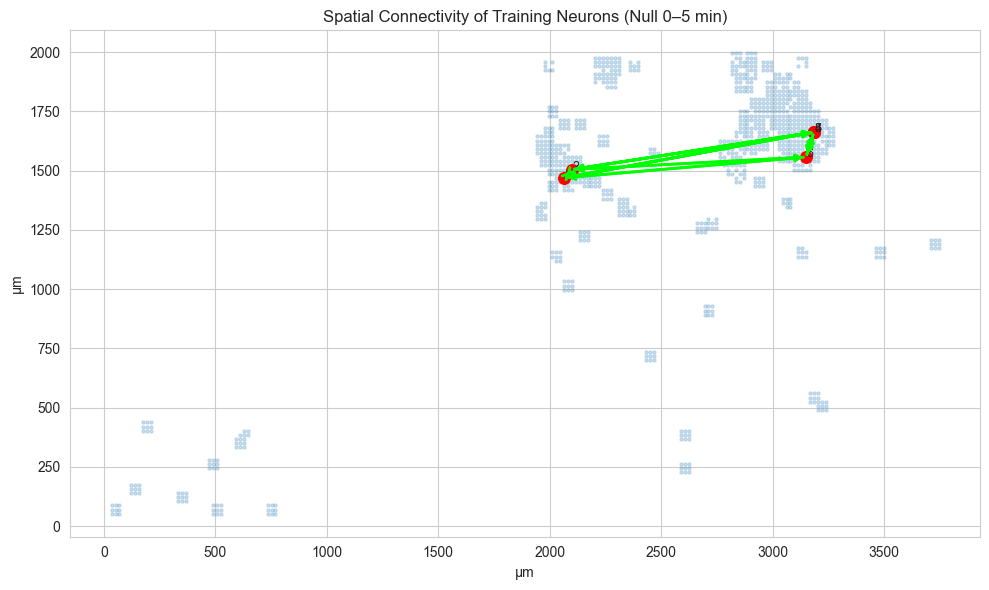

In [42]:
# Show spatial connectivity maps (first-order, training neurons only)
ole.show_training_spatial_connectivity_all_conditions()

In [43]:
# Compute latency histograms and top firing sequences
ole.compute_latency_histograms(window_ms=50, bin_size=5)
ole.compute_firing_orders(window_ms=100, top_k=10)

# Show latency histogram for a specific neuron pair
ole.show_latency_histogram("Adaptive", i=3, j=7)

# Visualize top firing orders for each condition
ole.show_firing_order_summary("Adaptive")
ole.show_firing_order_summary("Random")
ole.show_firing_order_summary("Null")

AttributeError: module 'core.spike_data_utils' has no attribute 'extract_common_firing_orders'

In [31]:
ole.compute_bursts()

In [32]:
ole.show_burst_stats("Adaptive")
ole.show_within_burst_dynamics("Adaptive")
ole.show_burst_latency_consistency("Adaptive")
ole.show_burst_propagation("Adaptive")

ValueError: too many values to unpack (expected 2)

In [33]:
ole.compare_burst_stats()
ole.compare_within_burst_dynamics()
ole.compare_burst_latency_consistency()
ole.compare_burst_propagation()

ValueError: too many values to unpack (expected 2)